# GAMA-12 master catalogue
## Checks and diagnostics

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))

This notebook was run with herschelhelp_internal version: 
970e176 (Mon Sep 11 16:26:40 2017 +0100)


In [10]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astropy import visualization as vis
import numpy as np
from matplotlib_venn import venn3, venn2

from herschelhelp_internal.masterlist import nb_compare_mags, nb_ccplots, nb_histograms

In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = os.environ.get('SUFFIX', time.strftime("_%Y%m%d"))
#SUFFIX = "_20170815"

master_catalogue = Table.read("{}/master_catalogue_gama-12{}.fits".format(OUT_DIR, SUFFIX))

## I - Summary of wavelength domains

In [4]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

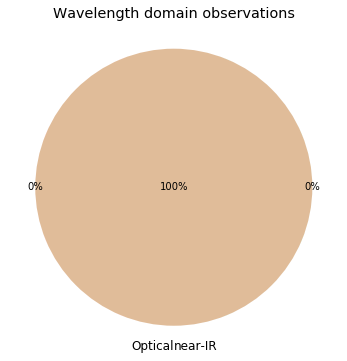

In [5]:
venn2(
    [
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 2),
        np.sum(flag_obs == 3)
    ],
    set_labels=('Optical', 'near-IR'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

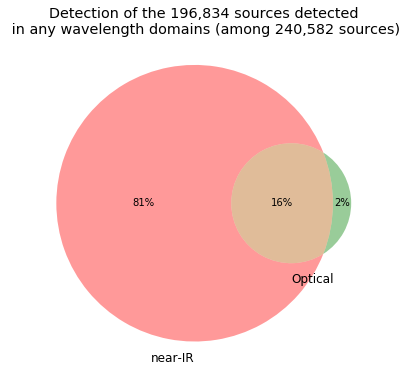

In [6]:
venn2(
    [
        np.sum(flag_det[flag_obs == 3] == 1),
        np.sum(flag_det[flag_obs == 3] == 2),
        np.sum(flag_det[flag_obs == 3] == 3)
    ],
    set_labels=('near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains "
          "(among {} sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [7]:
u_bands = [           "KIDS u"]
g_bands = ["DECam g", "KIDS g", "SUPRIME g", "GPC1 g"]
r_bands = ["DECam r", "KIDS r", "SUPRIME r", "GPC1 r"]
i_bands = ["DECam i", "KIDS i", "SUPRIME i", "GPC1 i"]
z_bands = ["DECam z",           "SUPRIME z", "GPC1 z"]
y_bands = ["DECam y",           "SUPRIME y", "GPC1 y"]

In [8]:
for band in g_bands:
    print(band, 'max:', np.nanmax(master_catalogue["m_{}".format(band.replace(" ", "_").lower())]))

DECam g max: nan
KIDS g max: 39.2869
SUPRIME g max: 1474.31
GPC1 g max: 25.5536003113


/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: All-NaN axis encountered
  from ipykernel import kernelapp as app


The Suprime g magnitudes are very wrong. They are almost all between 0 and 1.

### II.a - Comparing depths

We compare the histograms of the total aperture magnitudes of similar bands.

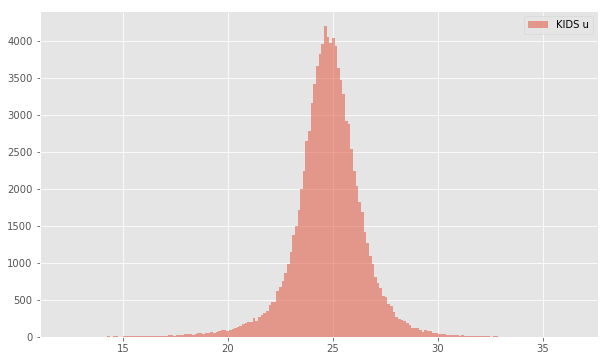

HELP warning: One or more of the columns is empty.


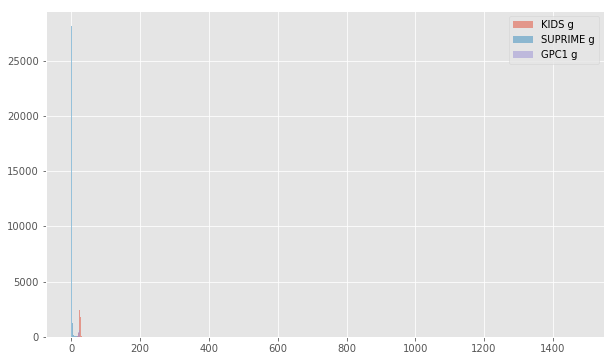

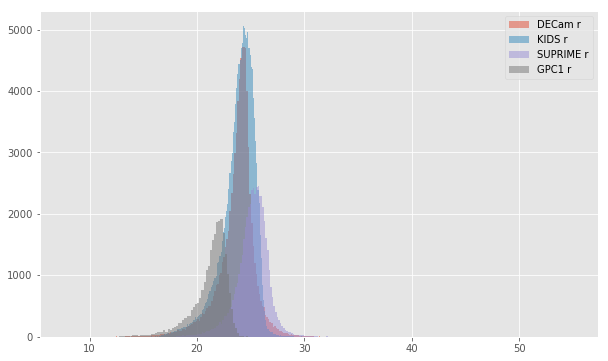

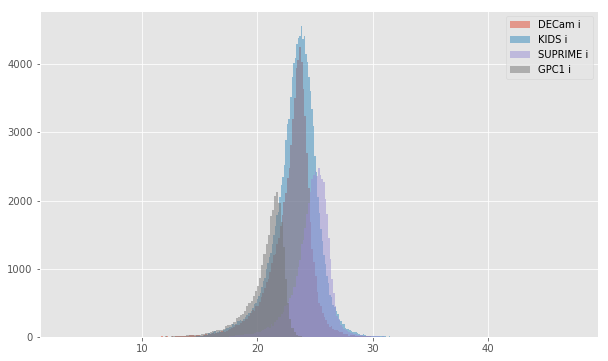

HELP warning: One or more of the columns is empty.


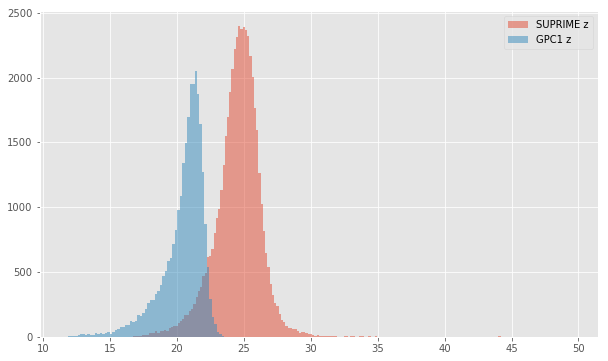

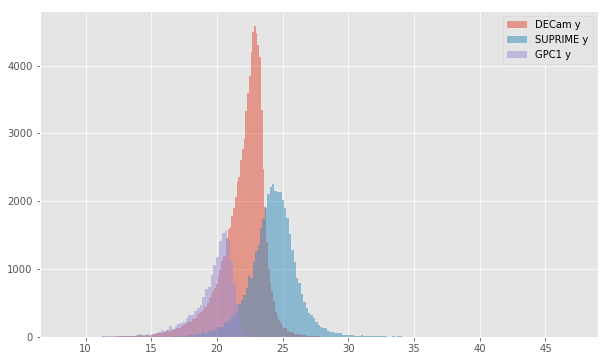

In [11]:
for bands in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    colnames = ["m_{}".format(band.replace(" ", "_").lower()) for band in bands]
    nb_histograms(master_catalogue, colnames, bands)

### II.b - Comparing magnitudes

We compare one to one each magnitude in similar bands.

There are no overlapping magnitudes...
There are no overlapping magnitudes...
There are no overlapping magnitudes...
There are no overlapping magnitudes...
There are no overlapping magnitudes...
There are no overlapping magnitudes...
SUPRIME g (aperture) - KIDS g (aperture):
- Median: -0.08
- Median Absolute Deviation: 0.14
- 1% percentile: -1.5488562774658203
- 99% percentile: 1.0536144256591797


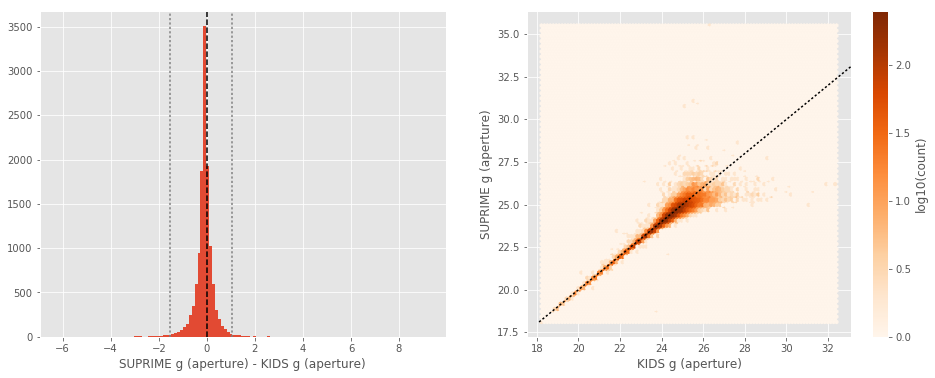

SUPRIME g (total) - KIDS g (total):
- Median: -23.97
- Median Absolute Deviation: 1.01
- 1% percentile: -27.413778877258302
- 99% percentile: -12.994022817611942


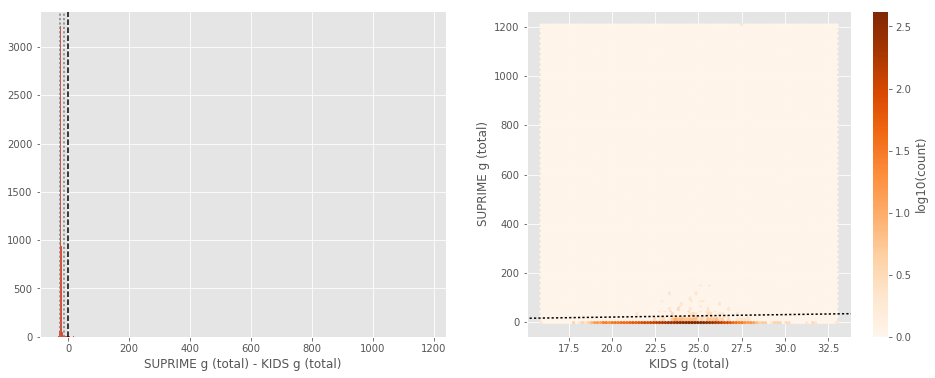

GPC1 g (aperture) - KIDS g (aperture):
- Median: -0.32
- Median Absolute Deviation: 0.31
- 1% percentile: -1.9660118865966796
- 99% percentile: 2.17626838684082


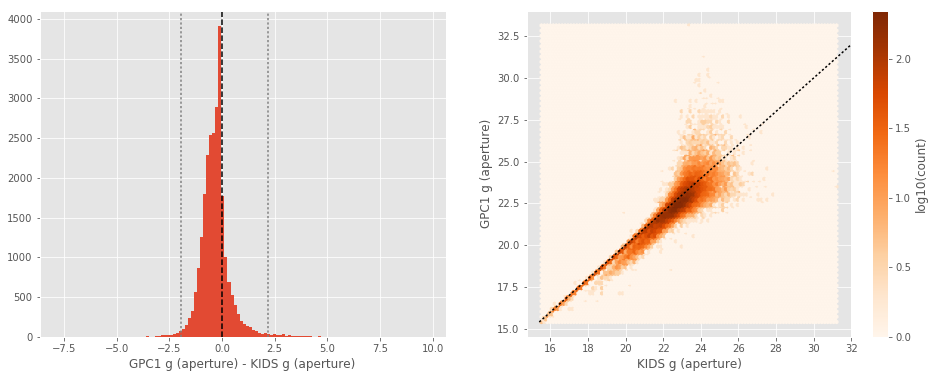

GPC1 g (total) - KIDS g (total):
- Median: -0.07
- Median Absolute Deviation: 0.14
- 1% percentile: -1.5362976074218748
- 99% percentile: 0.7708381652832024


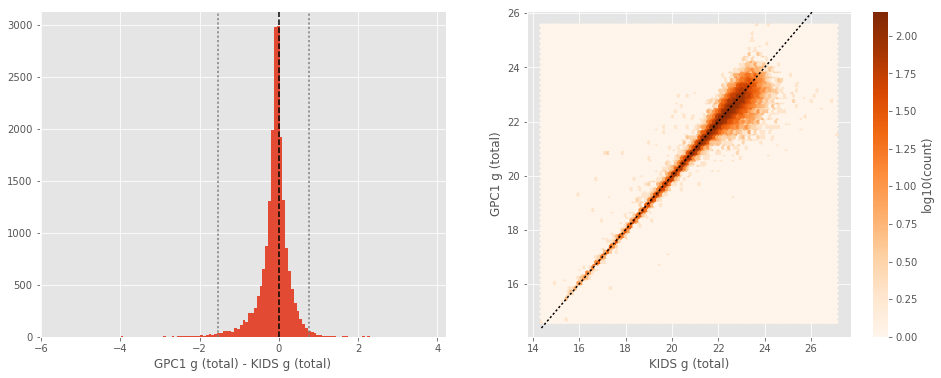

GPC1 g (aperture) - SUPRIME g (aperture):
- Median: -0.28
- Median Absolute Deviation: 0.33
- 1% percentile: -2.225453758239746
- 99% percentile: 2.4909464645385704


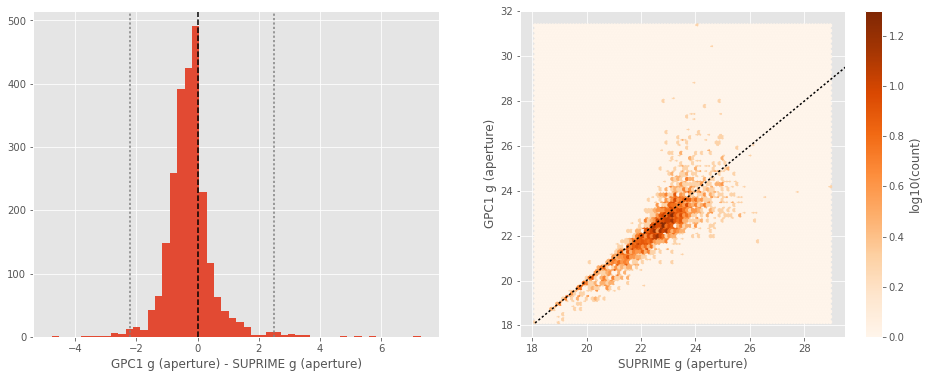

GPC1 g (total) - SUPRIME g (total):
- Median: 21.92
- Median Absolute Deviation: 0.71
- 1% percentile: 18.478320376444607
- 99% percentile: 23.73525542553514


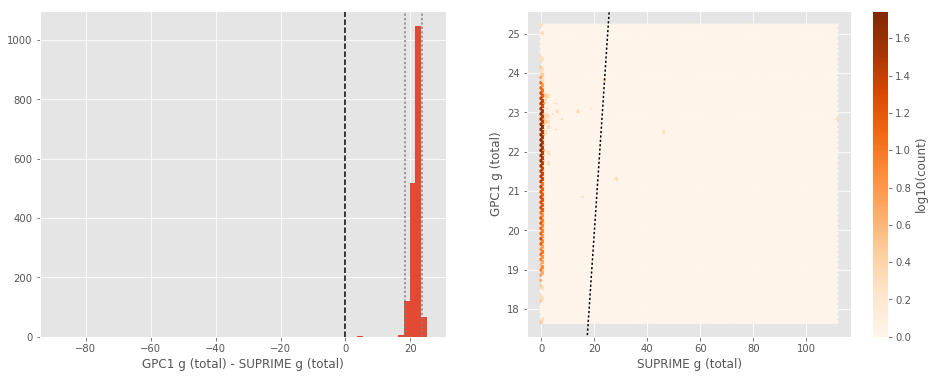

KIDS r (aperture) - DECam r (aperture):
- Median: -0.57
- Median Absolute Deviation: 0.40
- 1% percentile: -3.3454448699951174
- 99% percentile: 0.6561618804931634


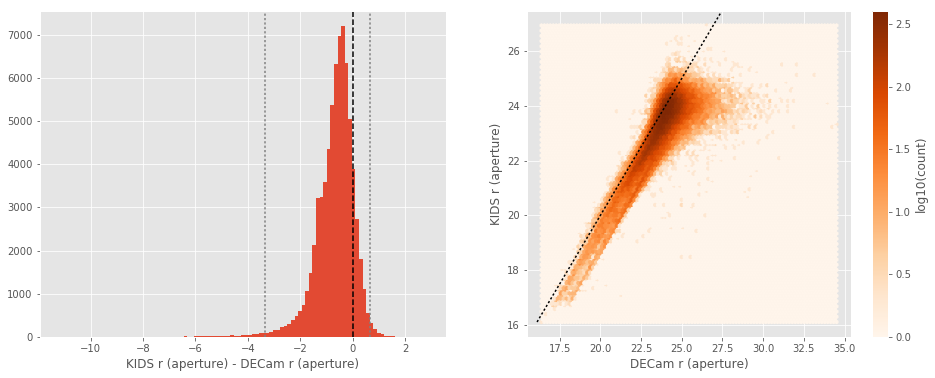

KIDS r (total) - DECam r (total):
- Median: -0.64
- Median Absolute Deviation: 0.41
- 1% percentile: -3.0668277740478516
- 99% percentile: 0.9448451995849609


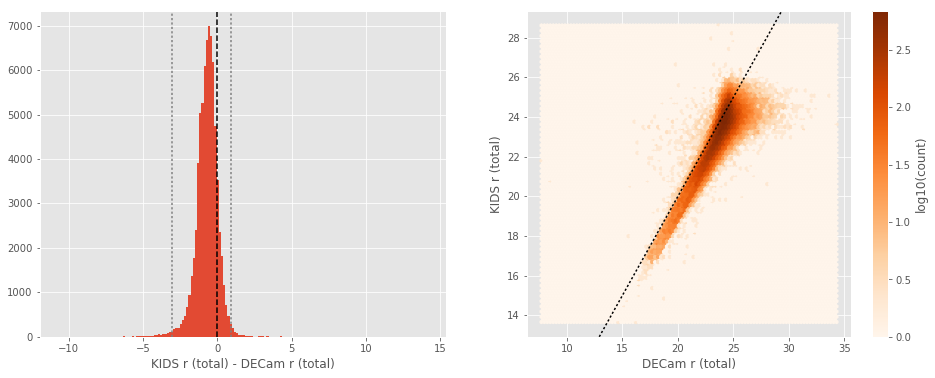

SUPRIME r (aperture) - DECam r (aperture):
- Median: -0.59
- Median Absolute Deviation: 0.38
- 1% percentile: -3.2374180603027343
- 99% percentile: 0.9653150939941407


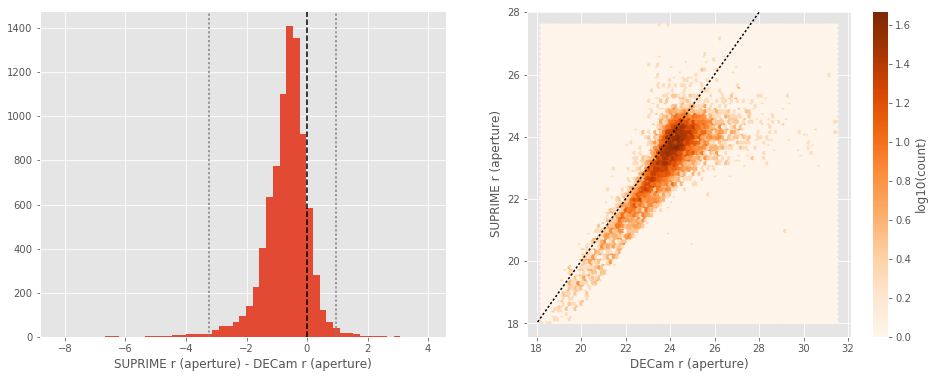

SUPRIME r (total) - DECam r (total):
- Median: -0.77
- Median Absolute Deviation: 0.37
- 1% percentile: -3.056801414489746
- 99% percentile: 0.9004903411865226


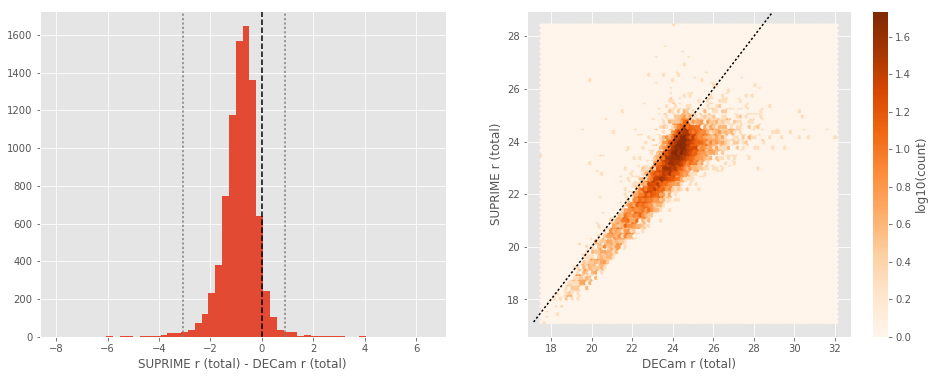

GPC1 r (aperture) - DECam r (aperture):
- Median: -0.99
- Median Absolute Deviation: 0.35
- 1% percentile: -3.187465190887451
- 99% percentile: 0.628423881530753


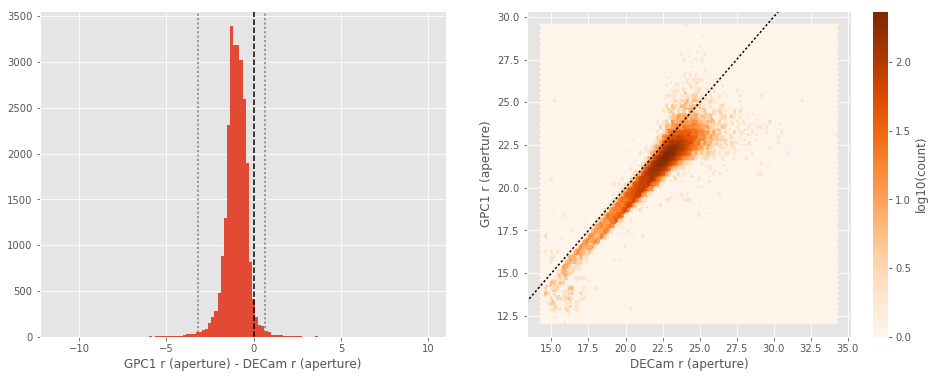

GPC1 r (total) - DECam r (total):
- Median: -0.81
- Median Absolute Deviation: 0.36
- 1% percentile: -2.513820571899414
- 99% percentile: 0.31960990905761716


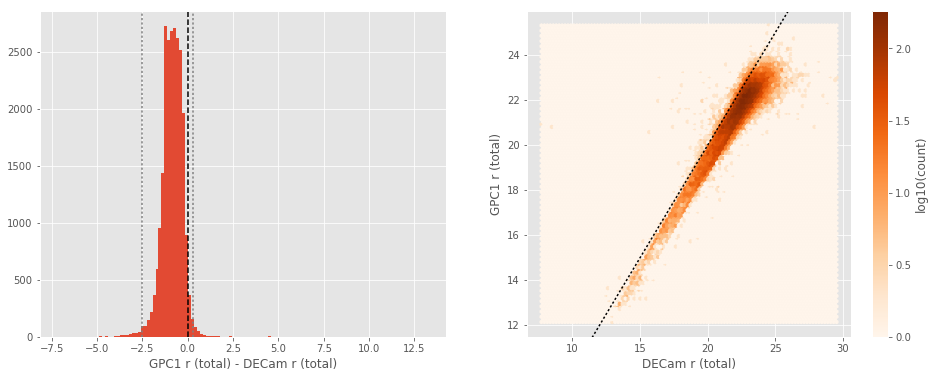

SUPRIME r (aperture) - KIDS r (aperture):
- Median: -0.02
- Median Absolute Deviation: 0.11
- 1% percentile: -0.8736766052246093
- 99% percentile: 1.09052505493164


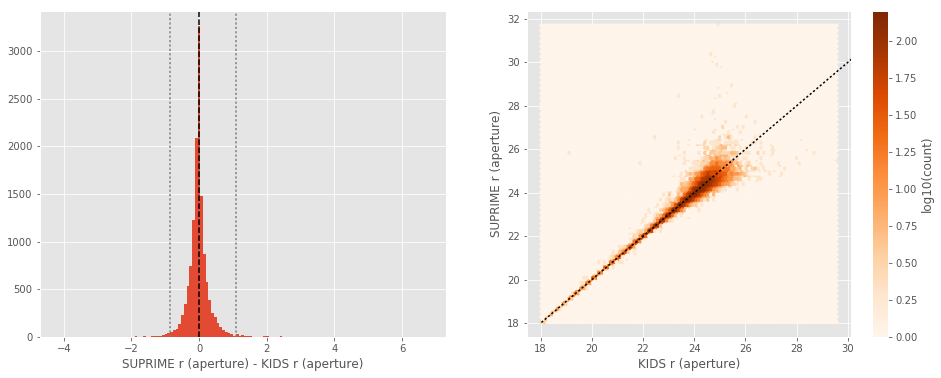

SUPRIME r (total) - KIDS r (total):
- Median: -0.20
- Median Absolute Deviation: 0.18
- 1% percentile: -1.345865249633789
- 99% percentile: 1.2027664184570312


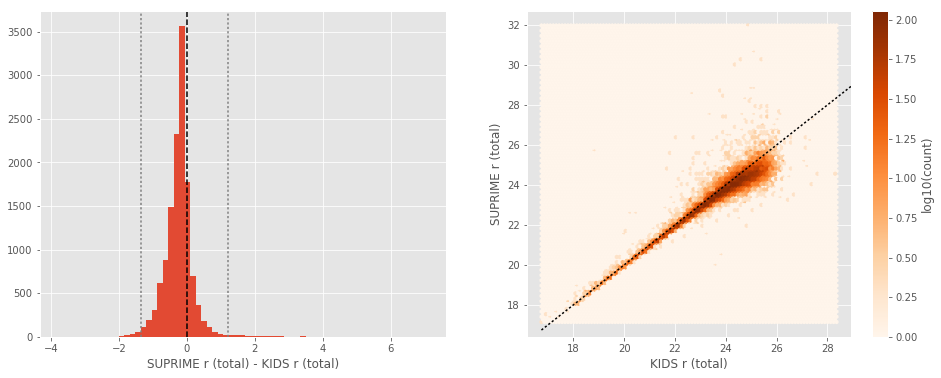

GPC1 r (aperture) - KIDS r (aperture):
- Median: -0.18
- Median Absolute Deviation: 0.23
- 1% percentile: -1.1584059524536132
- 99% percentile: 1.5873860549926766


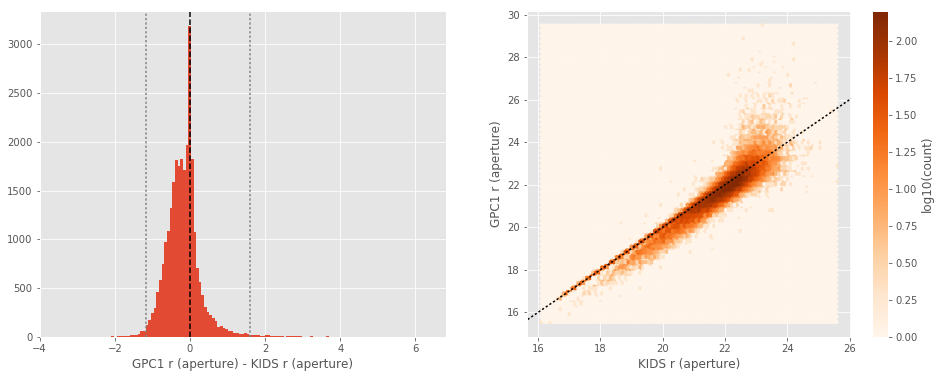

GPC1 r (total) - KIDS r (total):
- Median: 0.05
- Median Absolute Deviation: 0.11
- 1% percentile: -0.8814361572265624
- 99% percentile: 0.8034420013427723


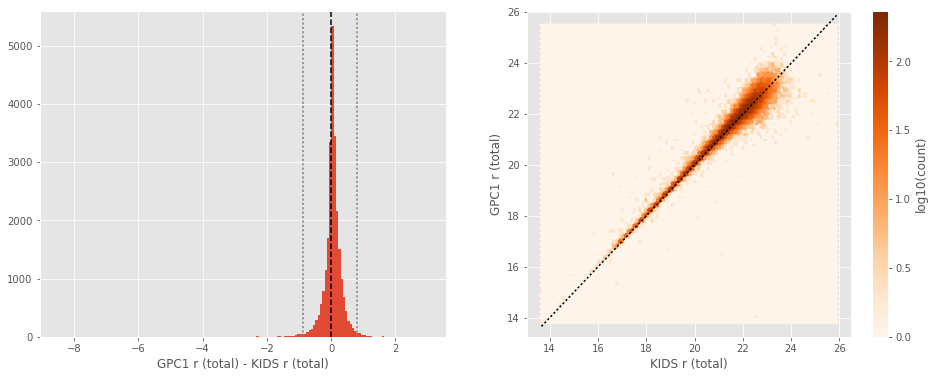

GPC1 r (aperture) - SUPRIME r (aperture):
- Median: -0.17
- Median Absolute Deviation: 0.25
- 1% percentile: -1.2685476303100587
- 99% percentile: 1.519218559265137


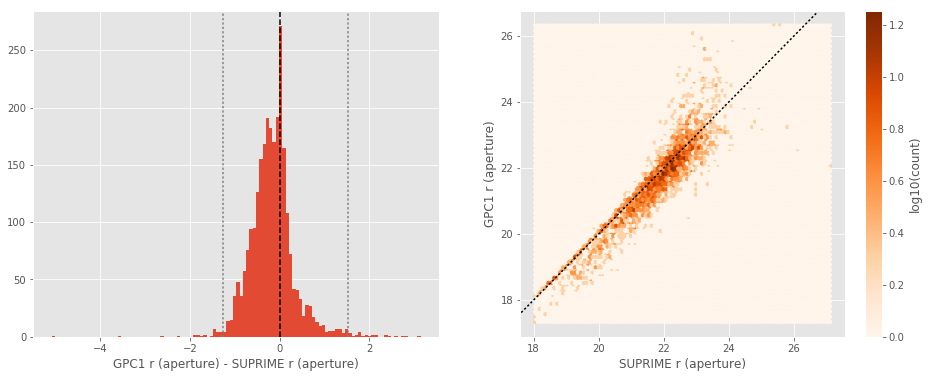

GPC1 r (total) - SUPRIME r (total):
- Median: 0.12
- Median Absolute Deviation: 0.12
- 1% percentile: -0.800140380859375
- 99% percentile: 0.8550567626953125


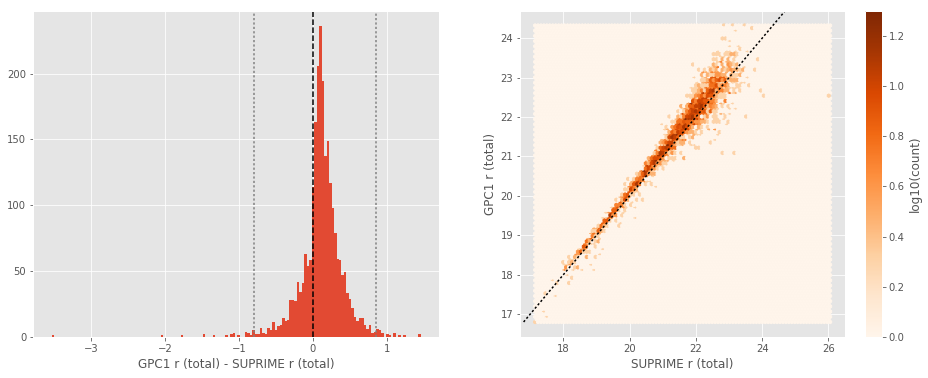

KIDS i (aperture) - DECam i (aperture):
- Median: -0.26
- Median Absolute Deviation: 0.35
- 1% percentile: -3.0967013549804685
- 99% percentile: 1.3136602783203108


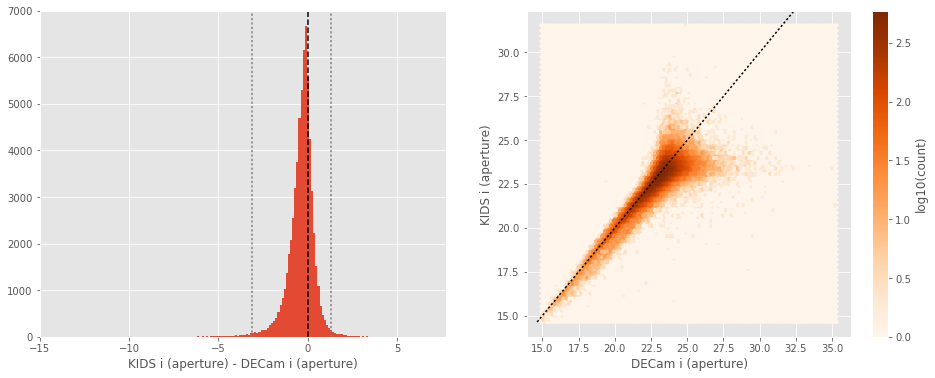

KIDS i (total) - DECam i (total):
- Median: -0.25
- Median Absolute Deviation: 0.33
- 1% percentile: -2.0476888275146483
- 99% percentile: 2.1961315536499066


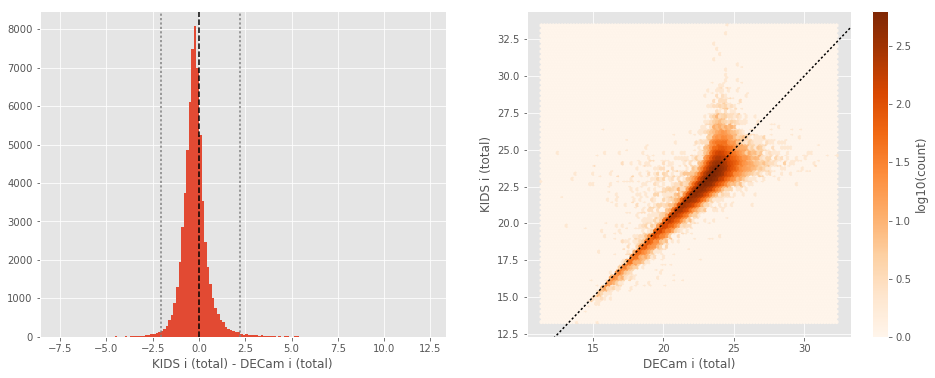

SUPRIME i (aperture) - DECam i (aperture):
- Median: -0.37
- Median Absolute Deviation: 0.35
- 1% percentile: -3.263638076782226
- 99% percentile: 1.05235855102539


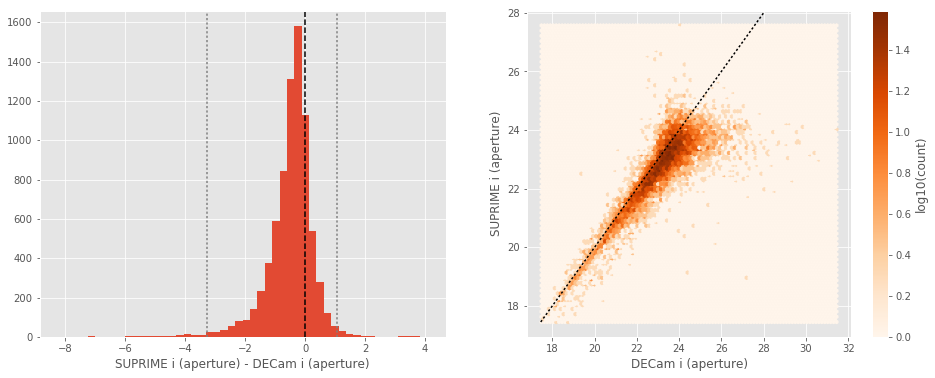

SUPRIME i (total) - DECam i (total):
- Median: -0.55
- Median Absolute Deviation: 0.31
- 1% percentile: -2.8007429122924803
- 99% percentile: 1.1771256828308112


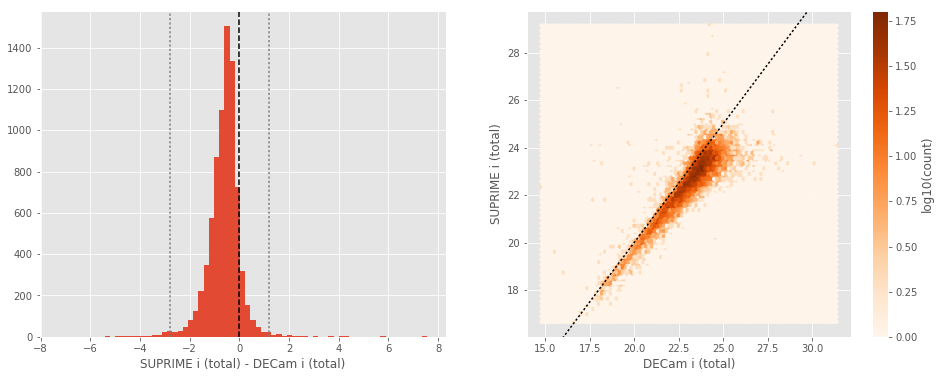

GPC1 i (aperture) - DECam i (aperture):
- Median: -0.48
- Median Absolute Deviation: 0.24
- 1% percentile: -2.4696116828918457
- 99% percentile: 0.6257455444335936


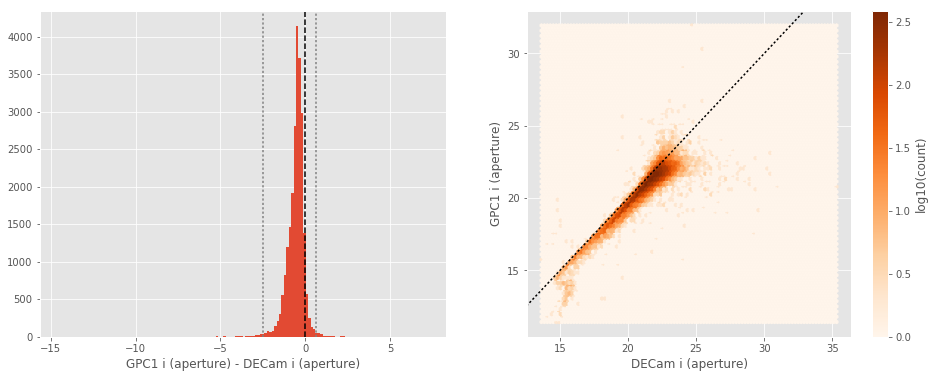

GPC1 i (total) - DECam i (total):
- Median: -0.29
- Median Absolute Deviation: 0.25
- 1% percentile: -1.7438424682617186
- 99% percentile: 0.7967903900146495


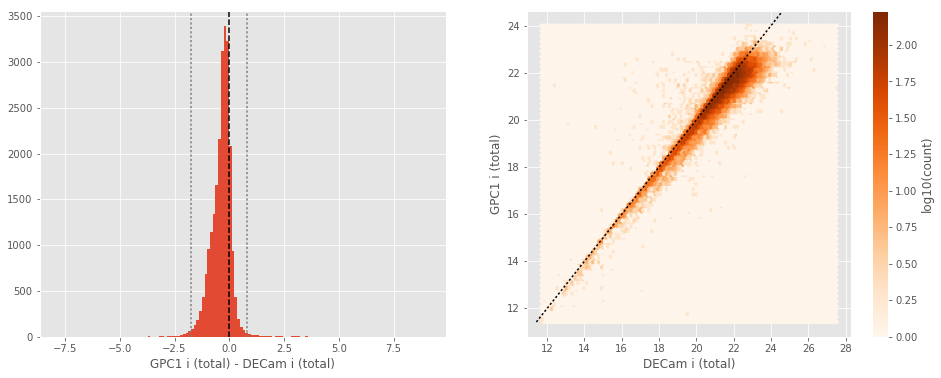

SUPRIME i (aperture) - KIDS i (aperture):
- Median: -0.12
- Median Absolute Deviation: 0.19
- 1% percentile: -2.173462219238281
- 99% percentile: 1.118977699279784


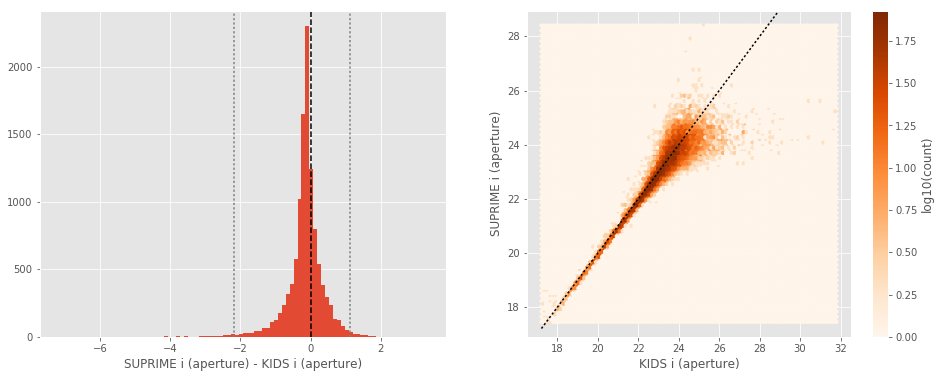

SUPRIME i (total) - KIDS i (total):
- Median: -0.39
- Median Absolute Deviation: 0.30
- 1% percentile: -3.178978824615479
- 99% percentile: 1.0687962532043422


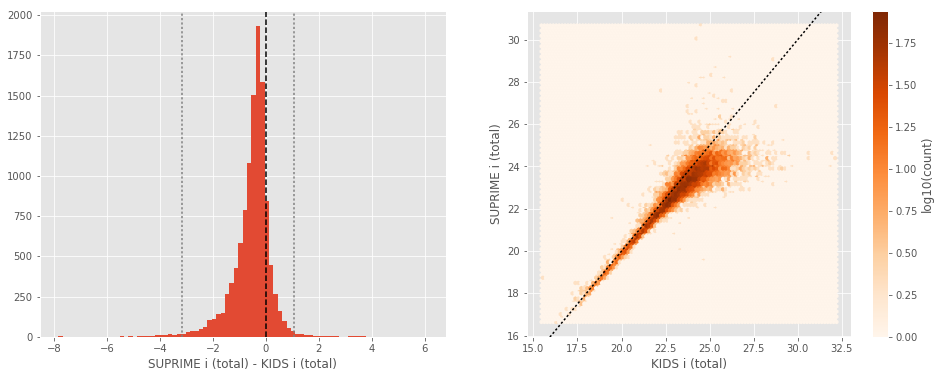

GPC1 i (aperture) - KIDS i (aperture):
- Median: -0.20
- Median Absolute Deviation: 0.21
- 1% percentile: -1.0685843658447265
- 99% percentile: 0.925297851562499


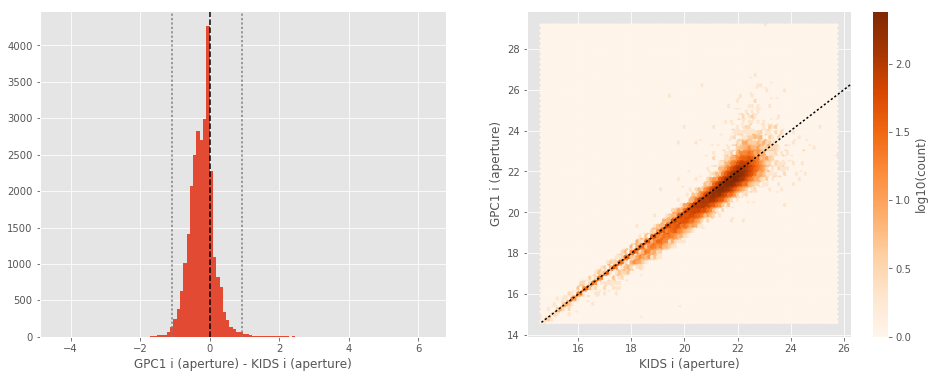

GPC1 i (total) - KIDS i (total):
- Median: -0.00
- Median Absolute Deviation: 0.13
- 1% percentile: -1.021039981842041
- 99% percentile: 0.7065951538085937


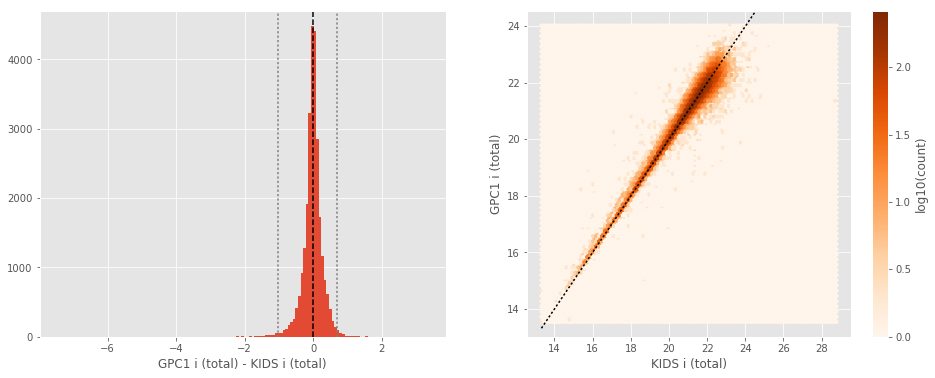

GPC1 i (aperture) - SUPRIME i (aperture):
- Median: -0.13
- Median Absolute Deviation: 0.20
- 1% percentile: -1.1185996627807617
- 99% percentile: 0.9535937499999989


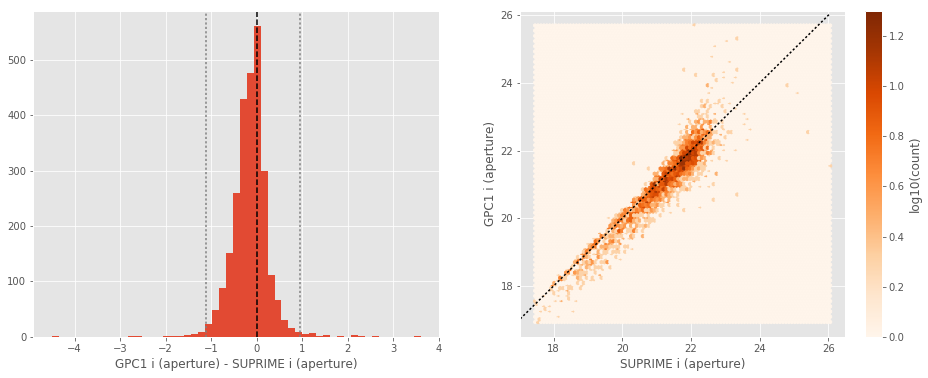

GPC1 i (total) - SUPRIME i (total):
- Median: 0.17
- Median Absolute Deviation: 0.11
- 1% percentile: -0.6998394203186036
- 99% percentile: 0.7319630622863764


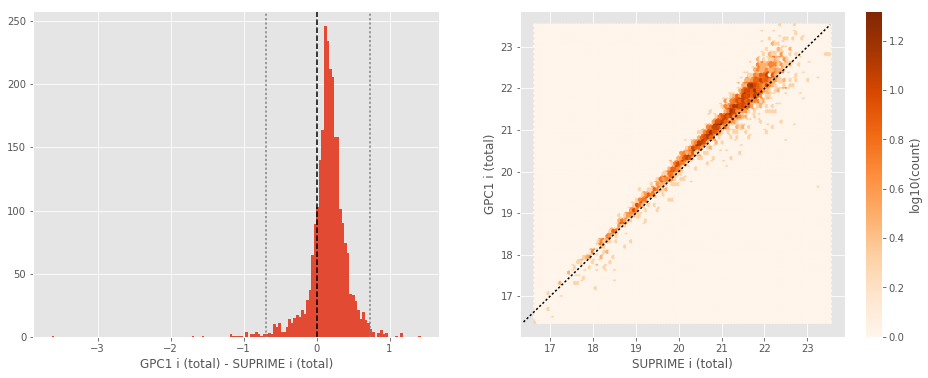

There are no overlapping magnitudes...
There are no overlapping magnitudes...
There are no overlapping magnitudes...
There are no overlapping magnitudes...
GPC1 z (aperture) - SUPRIME z (aperture):
- Median: -0.08
- Median Absolute Deviation: 0.21
- 1% percentile: -1.0182274436950682
- 99% percentile: 1.349607372283935


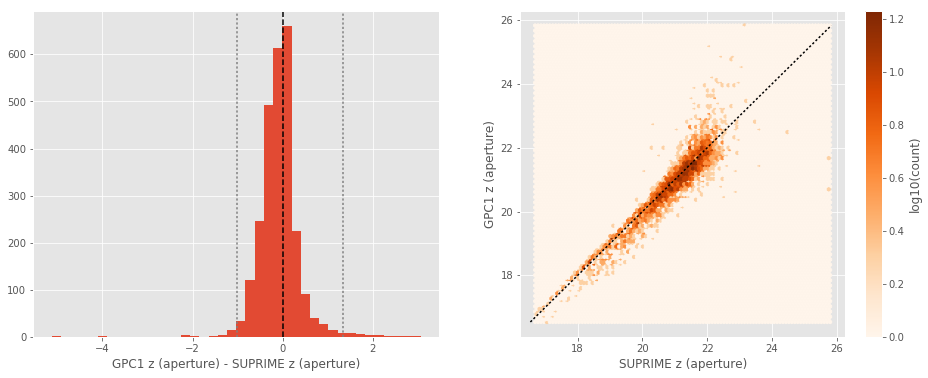

GPC1 z (total) - SUPRIME z (total):
- Median: 0.19
- Median Absolute Deviation: 0.11
- 1% percentile: -0.654204864501953
- 99% percentile: 0.876073989868162


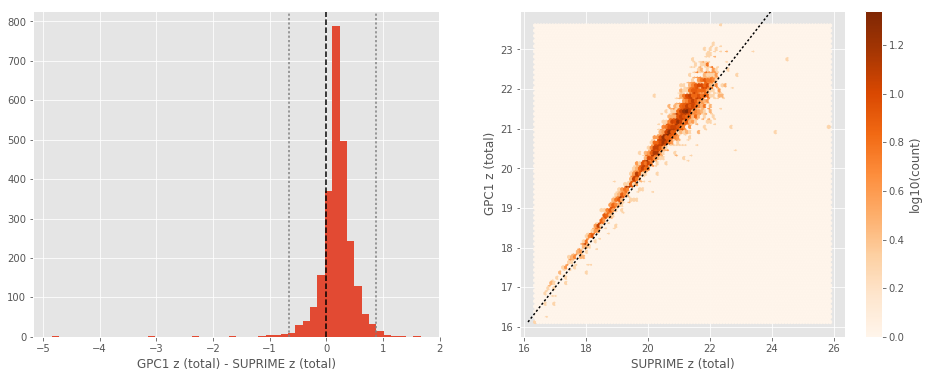

SUPRIME y (aperture) - DECam y (aperture):
- Median: -0.09
- Median Absolute Deviation: 0.23
- 1% percentile: -2.162190628051758
- 99% percentile: 1.399637603759766


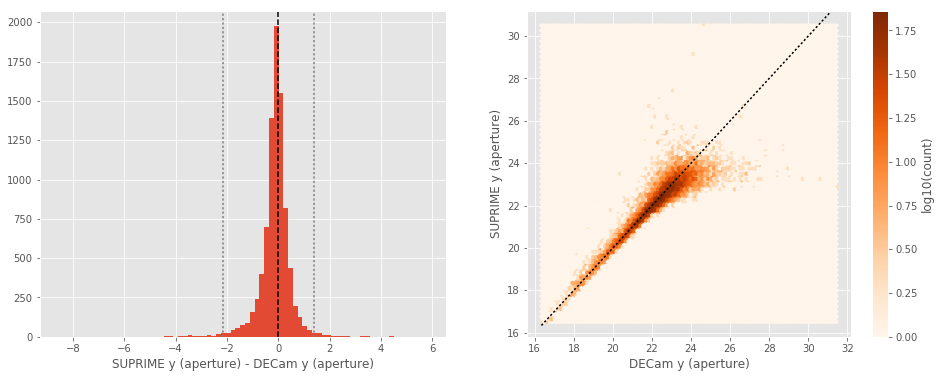

SUPRIME y (total) - DECam y (total):
- Median: -0.13
- Median Absolute Deviation: 0.17
- 1% percentile: -1.6298423767089842
- 99% percentile: 1.33919582366943


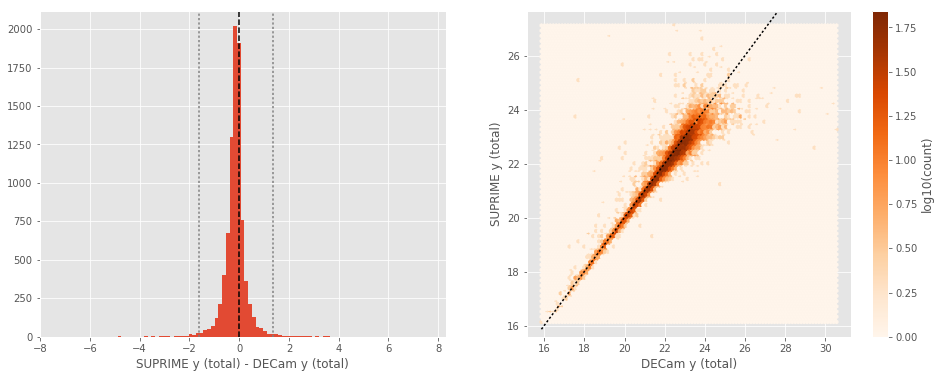

GPC1 y (aperture) - DECam y (aperture):
- Median: -0.15
- Median Absolute Deviation: 0.20
- 1% percentile: -1.6440140533447267
- 99% percentile: 2.3517134475708


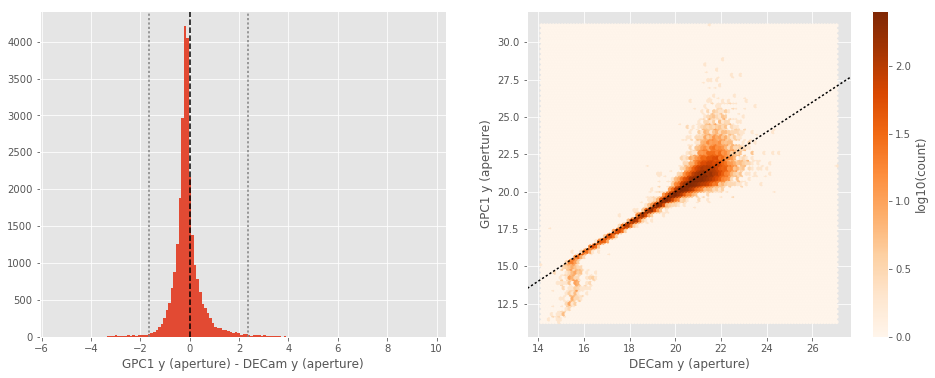

GPC1 y (total) - DECam y (total):
- Median: 0.12
- Median Absolute Deviation: 0.15
- 1% percentile: -0.8517160797119141
- 99% percentile: 1.0898412704467784


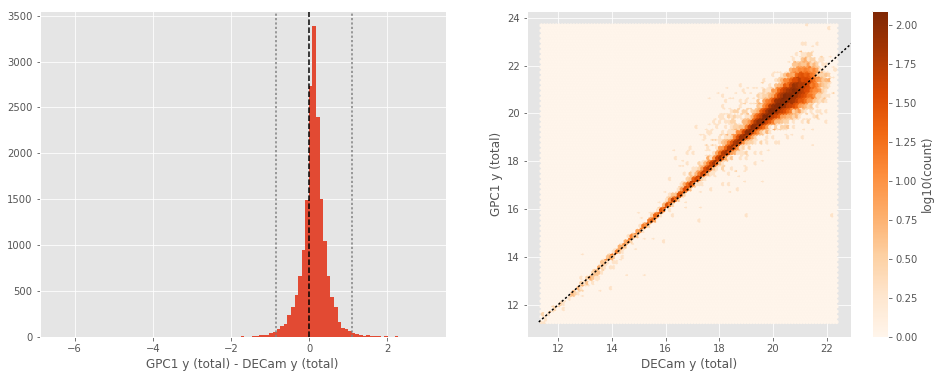

GPC1 y (aperture) - SUPRIME y (aperture):
- Median: -0.15
- Median Absolute Deviation: 0.30
- 1% percentile: -1.5202162551879883
- 99% percentile: 2.4514277267456053


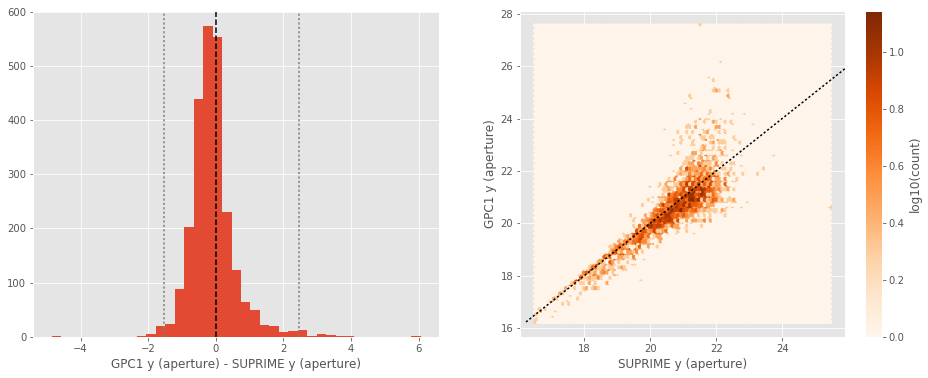

GPC1 y (total) - SUPRIME y (total):
- Median: 0.18
- Median Absolute Deviation: 0.17
- 1% percentile: -0.8296304893493651
- 99% percentile: 1.031737785339355


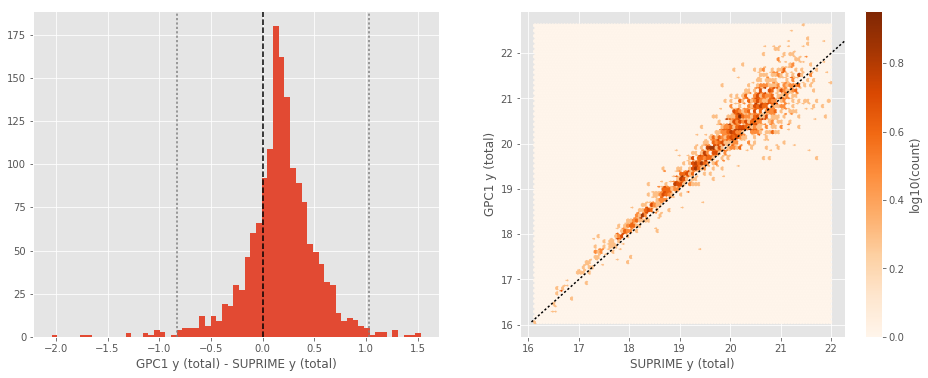

In [12]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to SDSS and 2MASS to compare its magnitudes to SDSS and 2MASS ones.

In [13]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.a - Comparing u, g, r, i, and z bands to SDSS

The catalogue is cross-matched to SDSS-DR13 withing 0.2 arcsecond. 

We compare the u, g, r, i, and z magnitudes to those from SDSS using `fiberMag` for the aperture magnitude and `petroMag`  for the total magnitude.

In [14]:
sdss = Table.read("../../dmu0/dmu0_SDSS-DR13/data/SDSS-DR13_GAMA-12.fits")
sdss_coords = SkyCoord(sdss['ra'] * u.deg, sdss['dec'] * u.deg)

idx, d2d, _ = sdss_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

sdss = sdss[mask]
ml_sdss_idx = idx[mask]

KIDS u (aperture) - SDSS u (fiberMag):
- Median: 0.07
- Median Absolute Deviation: 0.41
- 1% percentile: -1.6983850860595702
- 99% percentile: 2.932152404785156


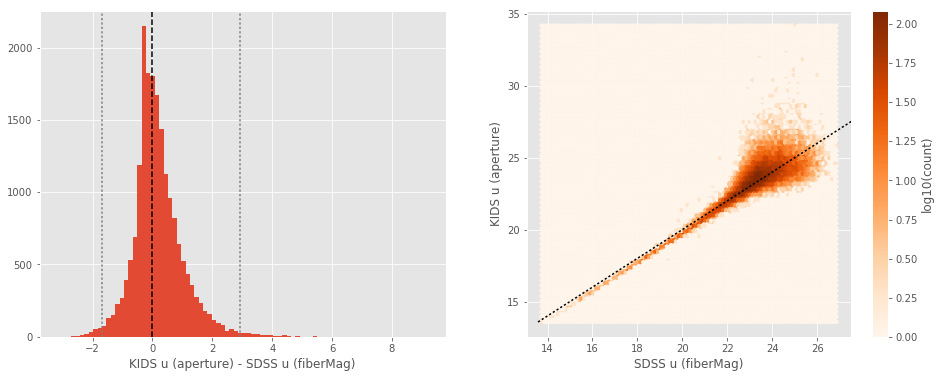

KIDS u (total) - SDSS u (petroMag):
- Median: 0.07
- Median Absolute Deviation: 0.41
- 1% percentile: -1.6983850860595702
- 99% percentile: 2.932152404785156


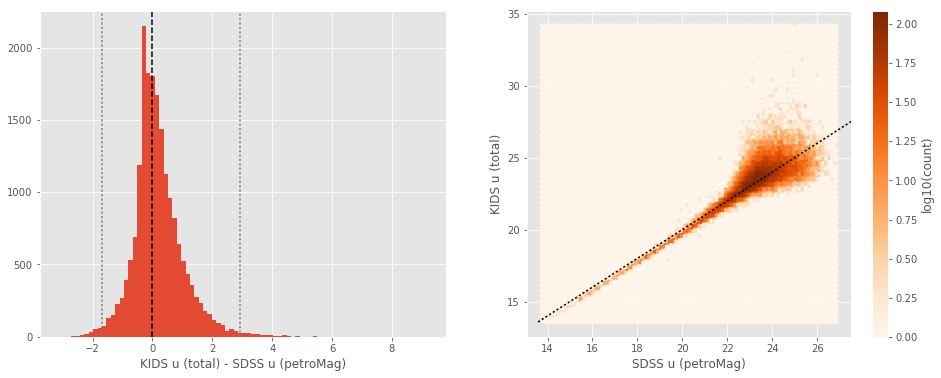

There are no overlapping magnitudes...
There are no overlapping magnitudes...
KIDS g (aperture) - SDSS g (fiberMag):
- Median: -0.18
- Median Absolute Deviation: 0.16
- 1% percentile: -0.975450553894043
- 99% percentile: 1.043121643066407


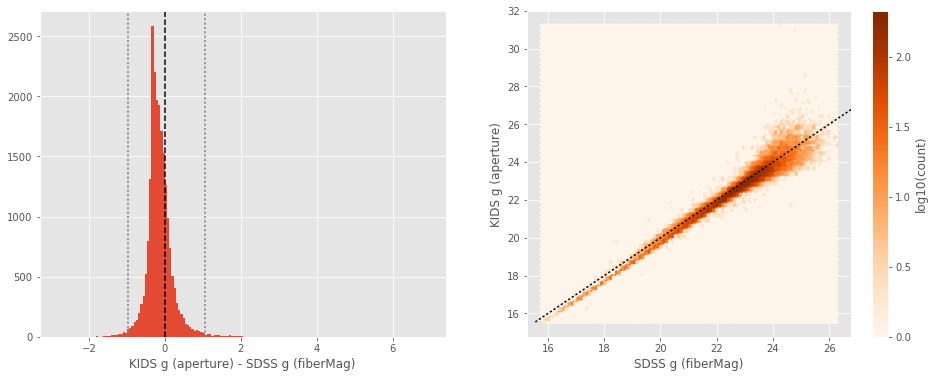

KIDS g (total) - SDSS g (petroMag):
- Median: -0.18
- Median Absolute Deviation: 0.16
- 1% percentile: -0.975450553894043
- 99% percentile: 1.043121643066407


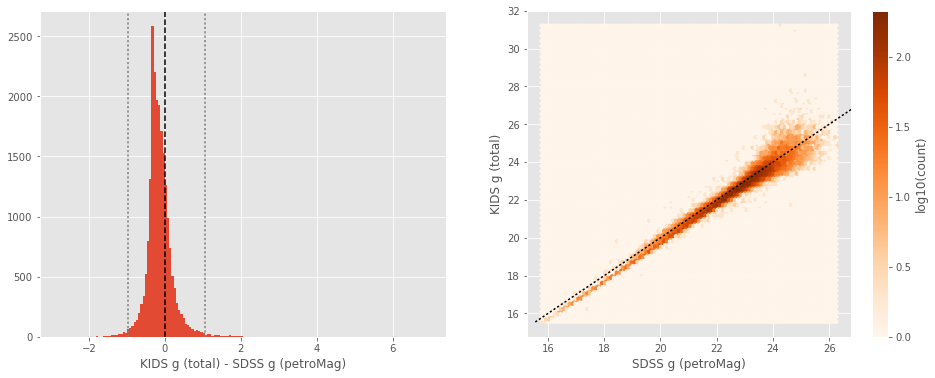

SUPRIME g (aperture) - SDSS g (fiberMag):
- Median: -0.27
- Median Absolute Deviation: 0.16
- 1% percentile: -1.0849077224731445
- 99% percentile: 1.0638479232788116


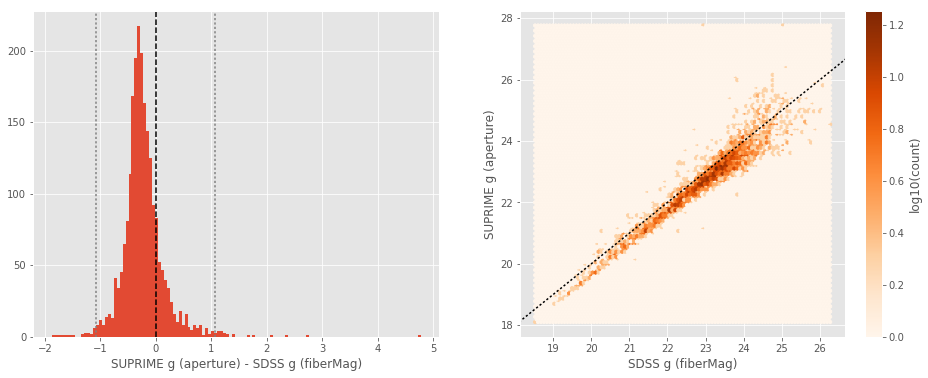

SUPRIME g (total) - SDSS g (petroMag):
- Median: -0.27
- Median Absolute Deviation: 0.16
- 1% percentile: -1.0849077224731445
- 99% percentile: 1.0638479232788116


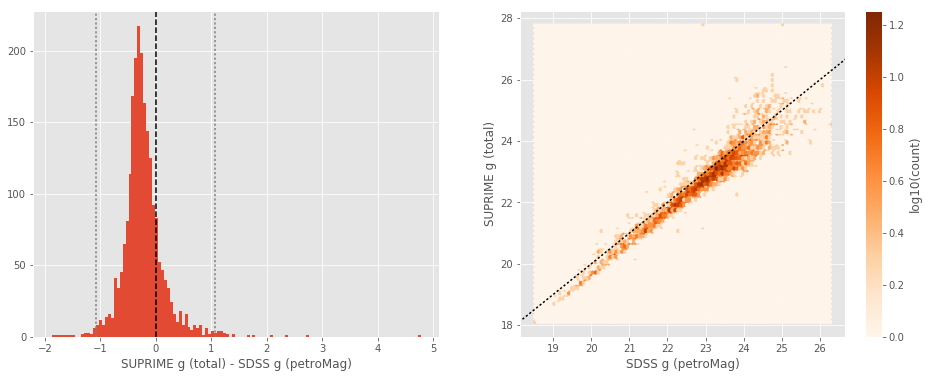

GPC1 g (aperture) - SDSS g (fiberMag):
- Median: -0.53
- Median Absolute Deviation: 0.24
- 1% percentile: -1.8524456405639649
- 99% percentile: 1.78222082138062


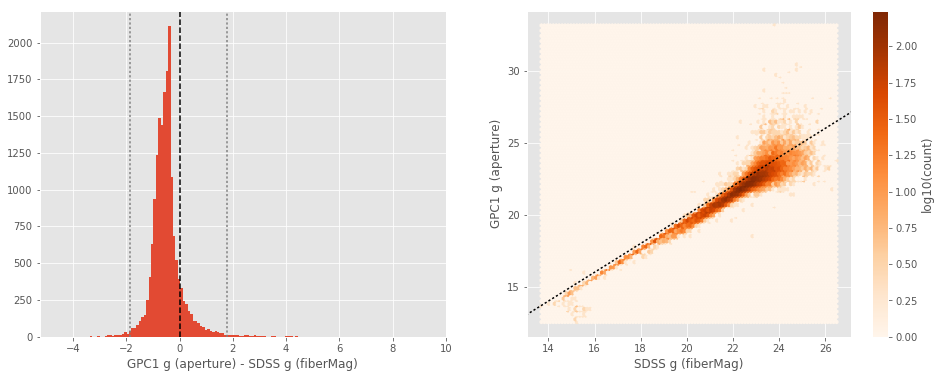

GPC1 g (total) - SDSS g (petroMag):
- Median: -0.53
- Median Absolute Deviation: 0.24
- 1% percentile: -1.8524456405639649
- 99% percentile: 1.78222082138062


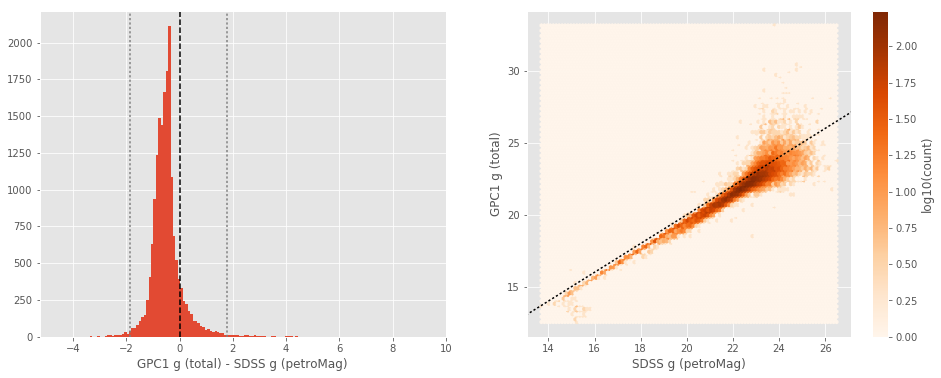

DECam r (aperture) - SDSS r (fiberMag):
- Median: 0.52
- Median Absolute Deviation: 0.35
- 1% percentile: -0.4504011344909668
- 99% percentile: 2.633285312652607


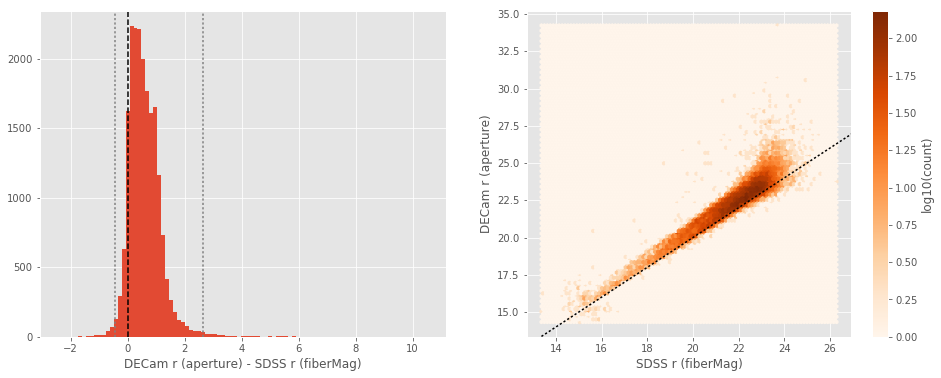

DECam r (total) - SDSS r (petroMag):
- Median: 0.52
- Median Absolute Deviation: 0.35
- 1% percentile: -0.4504011344909668
- 99% percentile: 2.633285312652607


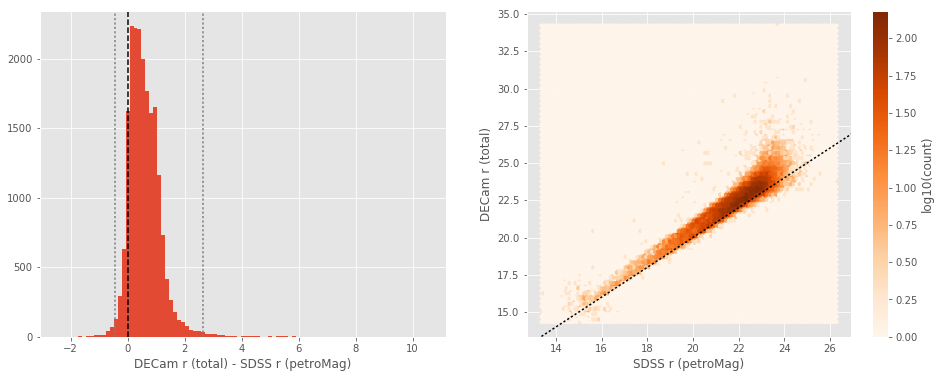

KIDS r (aperture) - SDSS r (fiberMag):
- Median: -0.23
- Median Absolute Deviation: 0.12
- 1% percentile: -0.9413606643676758
- 99% percentile: 0.4225929260253909


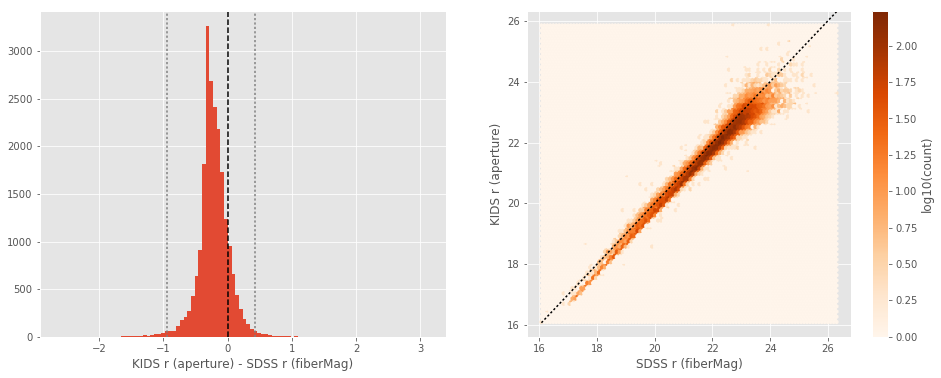

KIDS r (total) - SDSS r (petroMag):
- Median: -0.23
- Median Absolute Deviation: 0.12
- 1% percentile: -0.9413606643676758
- 99% percentile: 0.4225929260253909


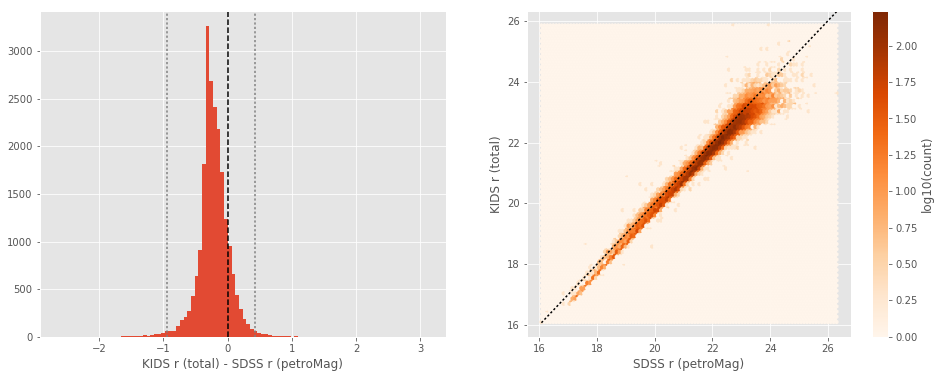

SUPRIME r (aperture) - SDSS r (fiberMag):
- Median: -0.27
- Median Absolute Deviation: 0.13
- 1% percentile: -1.0018709945678712
- 99% percentile: 0.4677202415466313


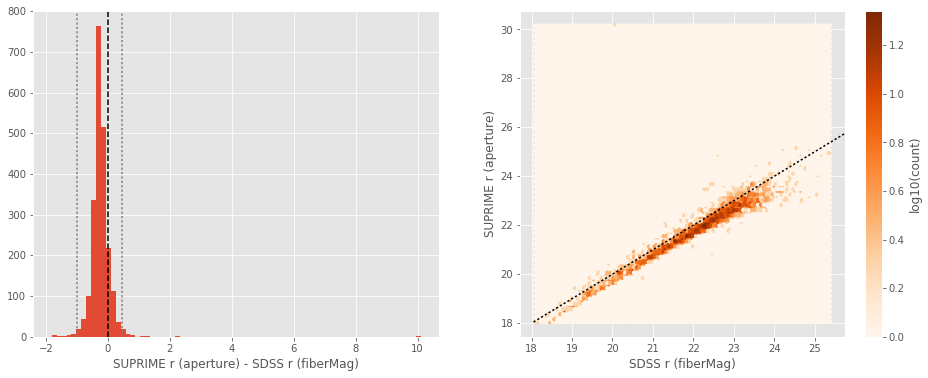

SUPRIME r (total) - SDSS r (petroMag):
- Median: -0.27
- Median Absolute Deviation: 0.13
- 1% percentile: -1.0018709945678712
- 99% percentile: 0.4677202415466313


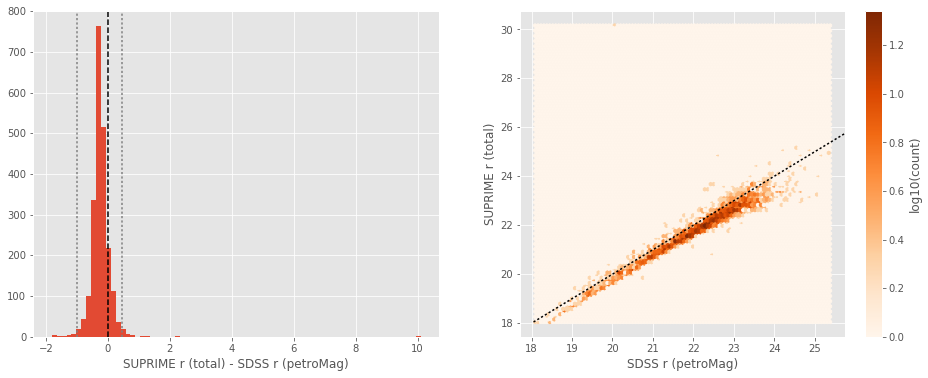

GPC1 r (aperture) - SDSS r (fiberMag):
- Median: -0.42
- Median Absolute Deviation: 0.17
- 1% percentile: -1.3079850769042969
- 99% percentile: 1.0488033294677728


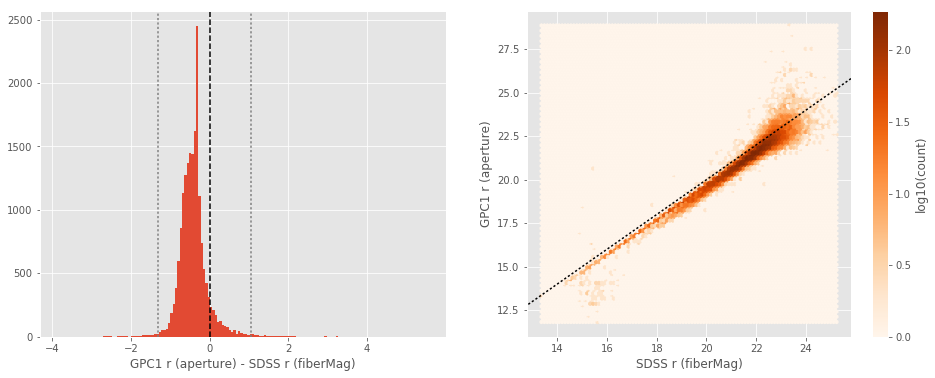

GPC1 r (total) - SDSS r (petroMag):
- Median: -0.42
- Median Absolute Deviation: 0.17
- 1% percentile: -1.3079850769042969
- 99% percentile: 1.0488033294677728


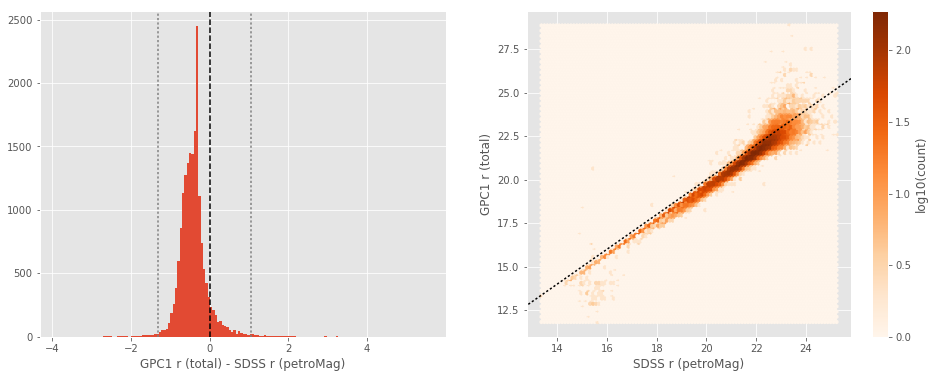

DECam i (aperture) - SDSS i (fiberMag):
- Median: -0.01
- Median Absolute Deviation: 0.21
- 1% percentile: -0.7190324974060058
- 99% percentile: 1.8164796066284201


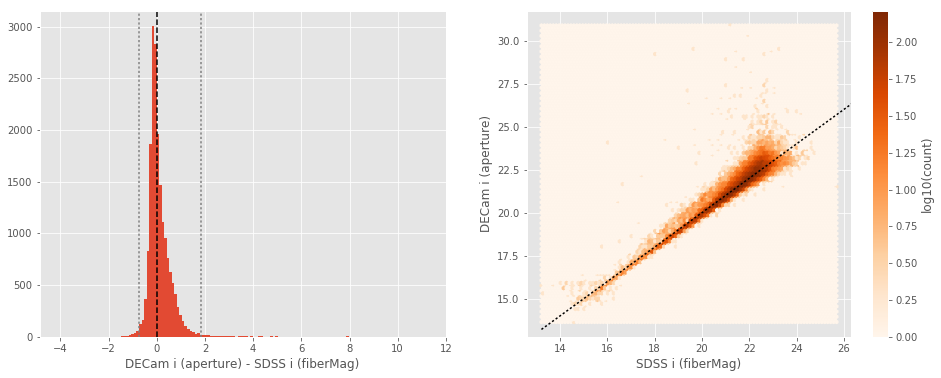

DECam i (total) - SDSS i (petroMag):
- Median: -0.01
- Median Absolute Deviation: 0.21
- 1% percentile: -0.7190324974060058
- 99% percentile: 1.8164796066284201


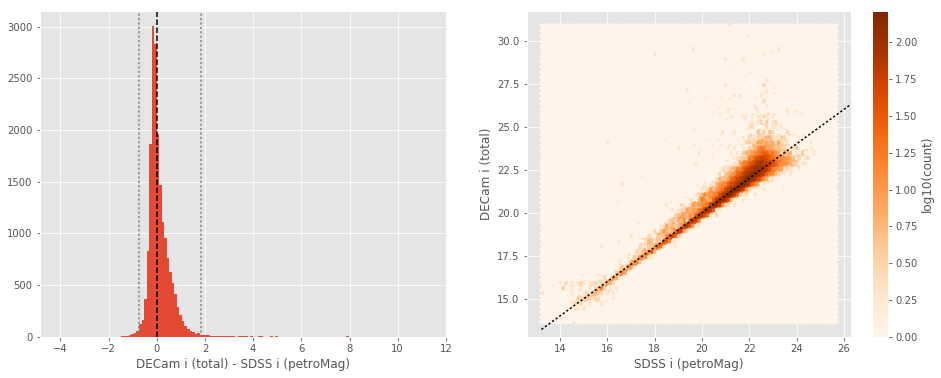

KIDS i (aperture) - SDSS i (fiberMag):
- Median: -0.20
- Median Absolute Deviation: 0.13
- 1% percentile: -0.9089030838012695
- 99% percentile: 0.5038987731933593


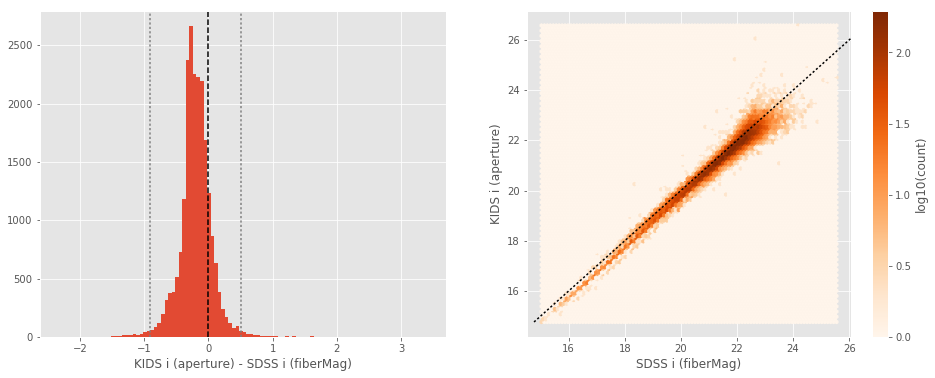

KIDS i (total) - SDSS i (petroMag):
- Median: -0.20
- Median Absolute Deviation: 0.13
- 1% percentile: -0.9089030838012695
- 99% percentile: 0.5038987731933593


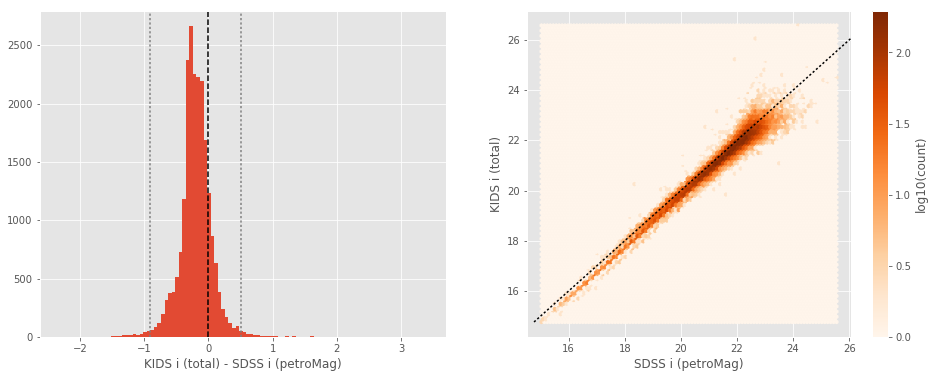

SUPRIME i (aperture) - SDSS i (fiberMag):
- Median: -0.30
- Median Absolute Deviation: 0.12
- 1% percentile: -0.9057099342346191
- 99% percentile: 0.49483638763427945


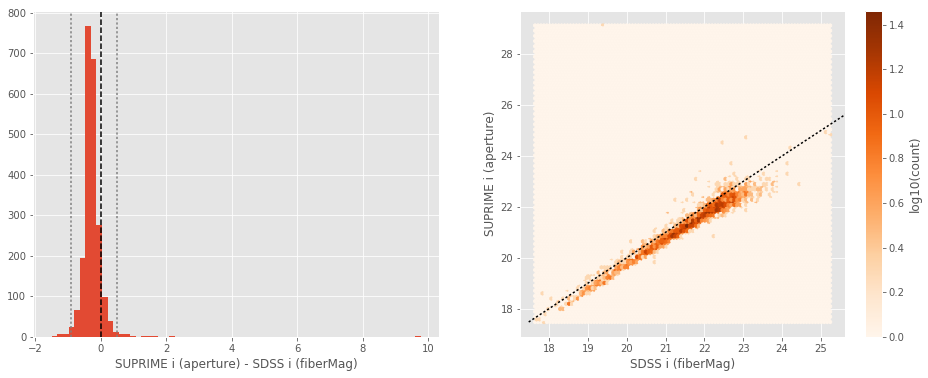

SUPRIME i (total) - SDSS i (petroMag):
- Median: -0.30
- Median Absolute Deviation: 0.12
- 1% percentile: -0.9057099342346191
- 99% percentile: 0.49483638763427945


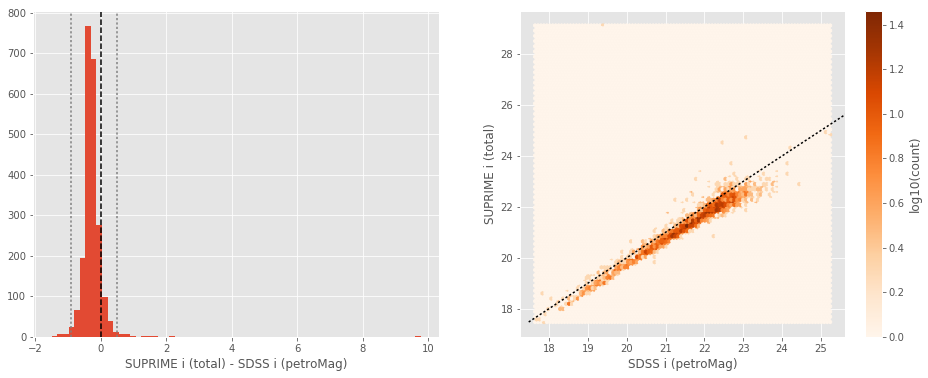

GPC1 i (aperture) - SDSS i (fiberMag):
- Median: -0.42
- Median Absolute Deviation: 0.13
- 1% percentile: -1.1332526016235351
- 99% percentile: 0.6276415634155289


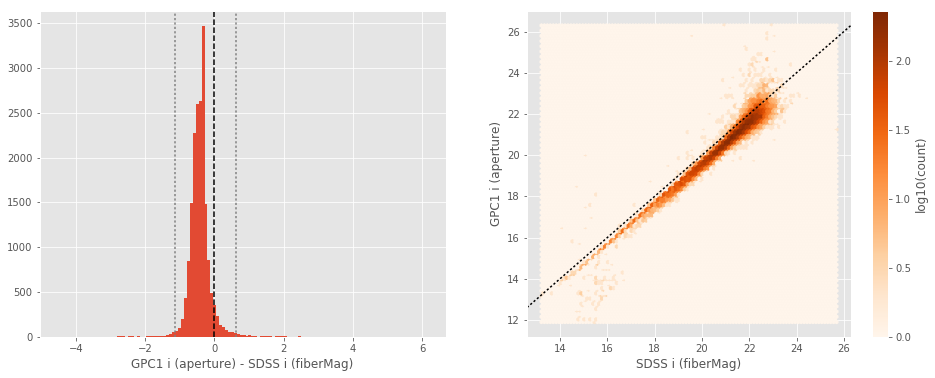

GPC1 i (total) - SDSS i (petroMag):
- Median: -0.42
- Median Absolute Deviation: 0.13
- 1% percentile: -1.1332526016235351
- 99% percentile: 0.6276415634155289


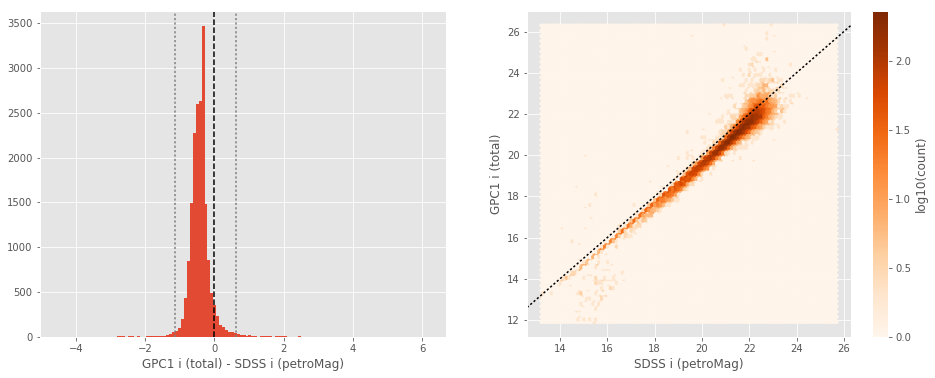

There are no overlapping magnitudes...
There are no overlapping magnitudes...
SUPRIME z (aperture) - SDSS z (fiberMag):
- Median: -0.17
- Median Absolute Deviation: 0.21
- 1% percentile: -1.2720305633544922
- 99% percentile: 1.0280384826660136


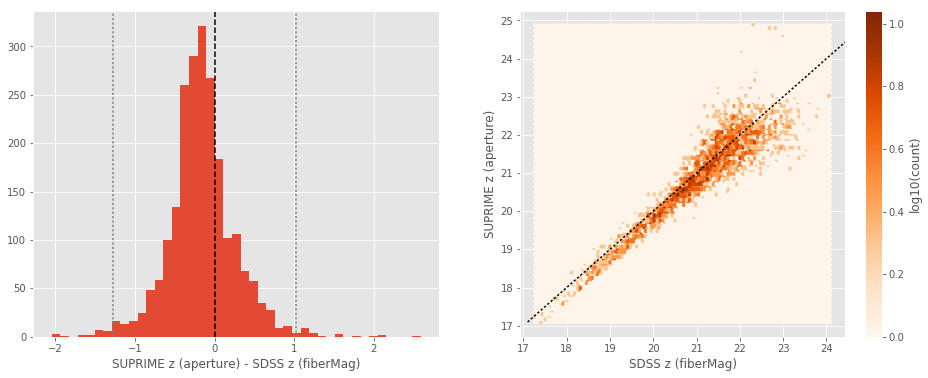

SUPRIME z (total) - SDSS z (petroMag):
- Median: -0.17
- Median Absolute Deviation: 0.21
- 1% percentile: -1.2720305633544922
- 99% percentile: 1.0280384826660136


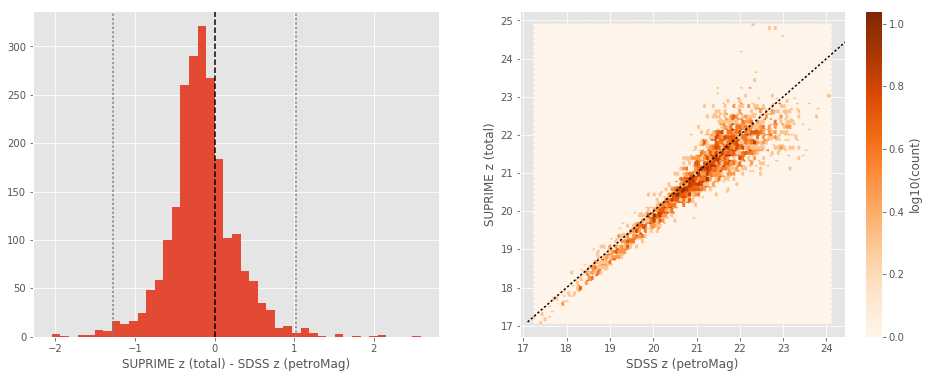

GPC1 z (aperture) - SDSS z (fiberMag):
- Median: -0.32
- Median Absolute Deviation: 0.19
- 1% percentile: -1.3771055221557615
- 99% percentile: 1.1781105995178272


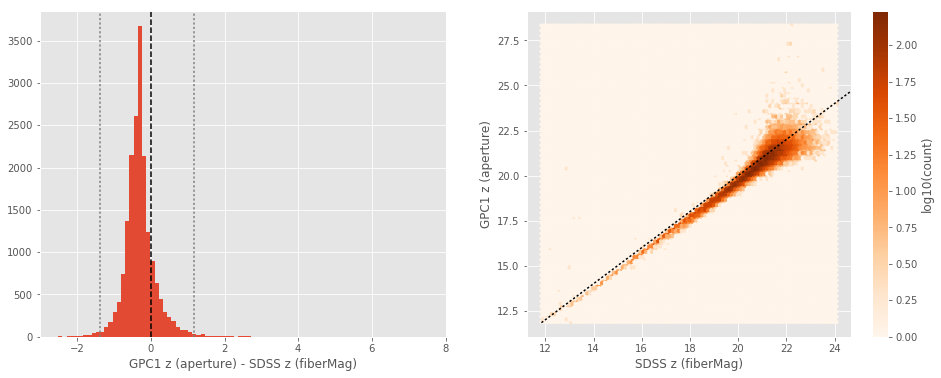

GPC1 z (total) - SDSS z (petroMag):
- Median: -0.32
- Median Absolute Deviation: 0.19
- 1% percentile: -1.3771055221557615
- 99% percentile: 1.1781105995178272


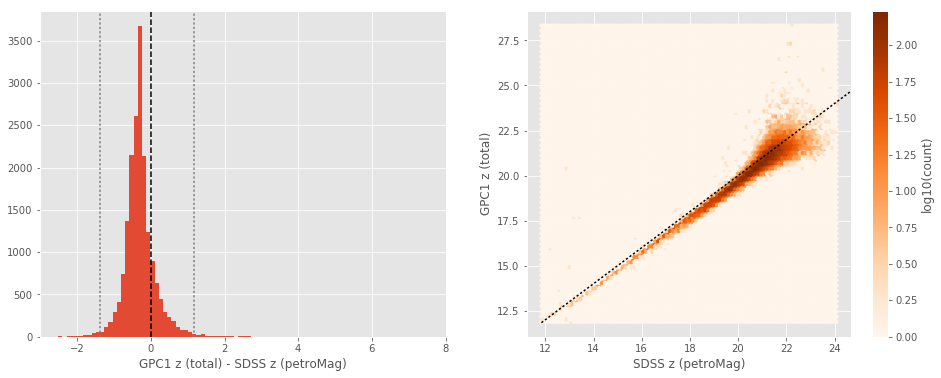

In [15]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands]:
    for band in band_of_a_kind:
        
        sdss_mag_ap = sdss["fiberMag_{}".format(band[-1])]
        master_cat_mag_ap = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
    
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (fiberMag)".format(band[-1]), "{} (aperture)".format(band)))
    
        sdss_mag_tot = sdss["petroMag_{}".format(band[-1])]
        master_cat_mag_tot = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
        
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (petroMag)".format(band[-1]), "{} (total)".format(band)))

### III.b - Comparing J and K bands to 2MASS

The catalogue is cross-matched to 2MASS-PSC withing 0.2 arcsecond. We compare the UKIDSS total J and K magnitudes to those from 2MASS.

The 2MASS magnitudes are “*Vega-like*” and we have to convert them to AB magnitudes using the zero points provided on [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html):

| Band | Fν - 0 mag (Jy) |
|------|-----------------|
| J    | 1594            |
| H    | 1024            |
| Ks   | 666.7           |

In addition, UKIDSS uses a K band whereas 2MASS uses a Ks (“short”) band, [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4b.html) give a correction to convert the K band in a Ks band with the formula:

$$K_{s(2MASS)} = K_{UKIRT} + 0.003 + 0.004 * (J−K)_{UKIRT}$$

In [16]:
# The AB zero point is 3631 Jy
j_2mass_to_ab = 2.5 * np.log10(3631/1595)
k_2mass_to_ab = 2.5 * np.log10(3631/666.7)

In [18]:
twomass = Table.read("../../dmu0/dmu0_2MASS-point-sources/data/2MASS-PSC_GAMA-12.fits")
twomass_coords = SkyCoord(twomass['raj2000'], twomass['dej2000'])

idx, d2d, _ = twomass_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

twomass = twomass[mask]
ml_twomass_idx = idx[mask]

UKIDSS J (total) - 2MASS J:
- Median: 0.05
- Median Absolute Deviation: 0.06
- 1% percentile: -0.7344516050626583
- 99% percentile: 2.630781808786218


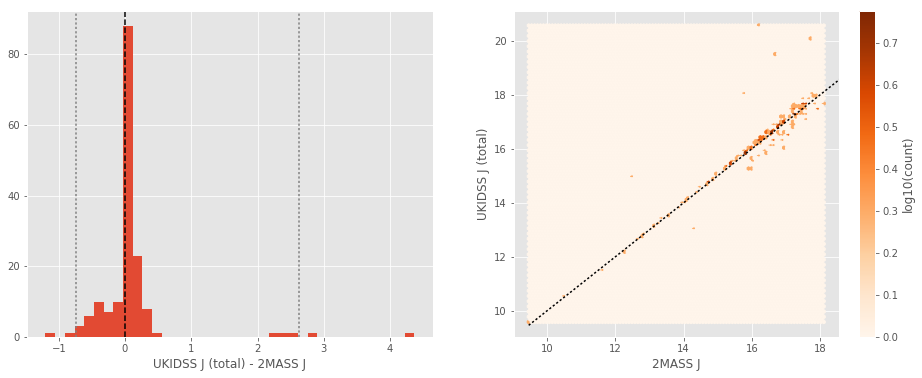

In [21]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_wfcam_j'][ml_twomass_idx],
                labels=("2MASS J", "UKIDSS J (total)"))

UKIDSS Ks-like (total) - 2MASS Ks:
- Median: 0.09
- Median Absolute Deviation: 0.13
- 1% percentile: -0.8985151093157318
- 99% percentile: 0.7051964484540435


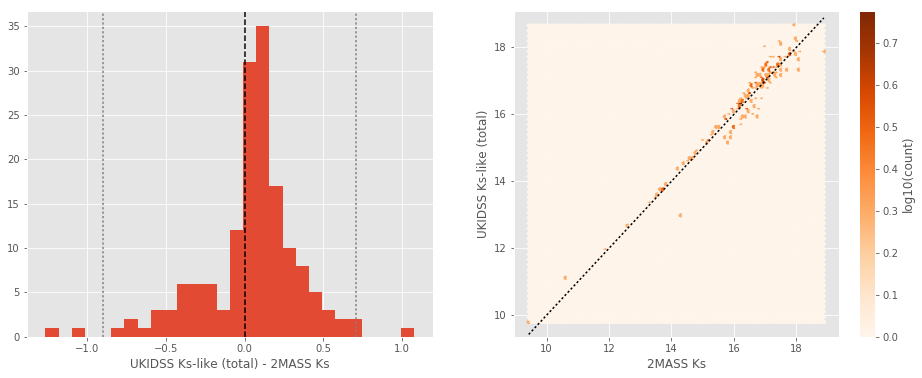

In [23]:
ukidss_ks_like = master_catalogue['m_wfcam_k'] + 0.003 + 0.004 * (
    master_catalogue['m_wfcam_j'] - master_catalogue['m_wfcam_k'])
nb_compare_mags(twomass['kmag'] + k_2mass_to_ab, ukidss_ks_like[ml_twomass_idx],
                labels=("2MASS Ks", "UKIDSS Ks-like (total)"))

VISTA J (total) - 2MASS J:
- Median: -0.93
- Median Absolute Deviation: 0.11
- 1% percentile: -2.076719272451575
- 99% percentile: 0.5505881491945949


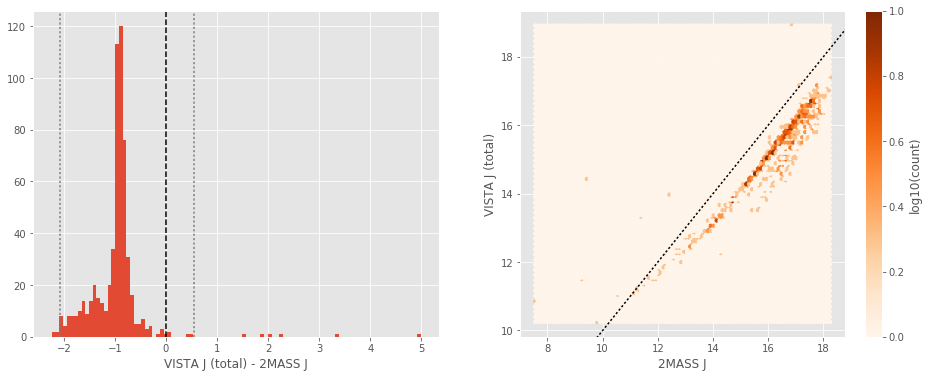

In [25]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_vircam_j'][ml_twomass_idx],
                labels=("2MASS J", "VISTA J (total)"))

VISTA Ks (total) - 2MASS Ks:
- Median: -1.82
- Median Absolute Deviation: 0.15
- 1% percentile: -2.9663810332354124
- 99% percentile: -0.781294438997135


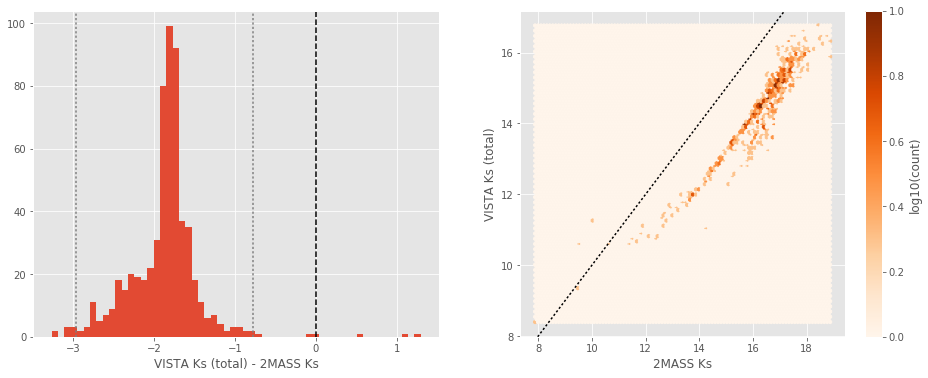

In [26]:
nb_compare_mags(twomass['kmag'] + k_2mass_to_ab, master_catalogue['m_vircam_k'][ml_twomass_idx],
                labels=("2MASS Ks", "VISTA Ks (total)"))

## IV - Comparing aperture magnitudes to total ones.

Number of source used: 49412 / 240582 (20.54%)


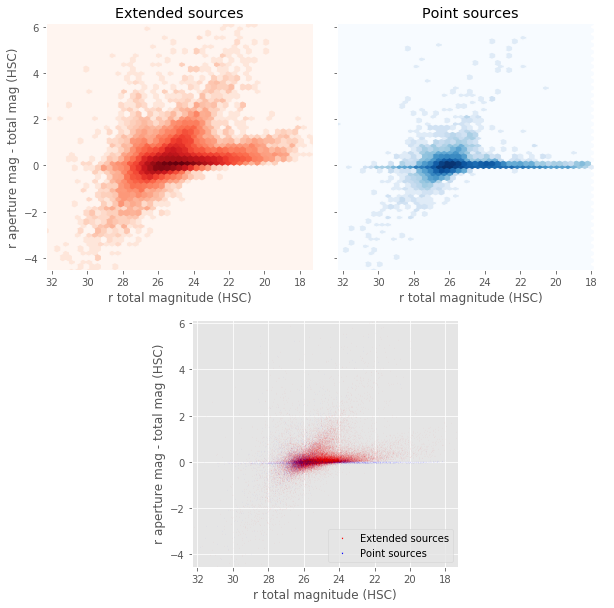

In [27]:
nb_ccplots(
    master_catalogue['m_suprime_r'],
    master_catalogue['m_ap_suprime_r'] - master_catalogue['m_suprime_r'],
    "r total magnitude (HSC)", "r aperture mag - total mag (HSC)",
    master_catalogue["stellarity"],
    invert_x=True
)

## V - Color-color and magnitude-color plots

Number of source used: 29 / 240582 (0.01%)


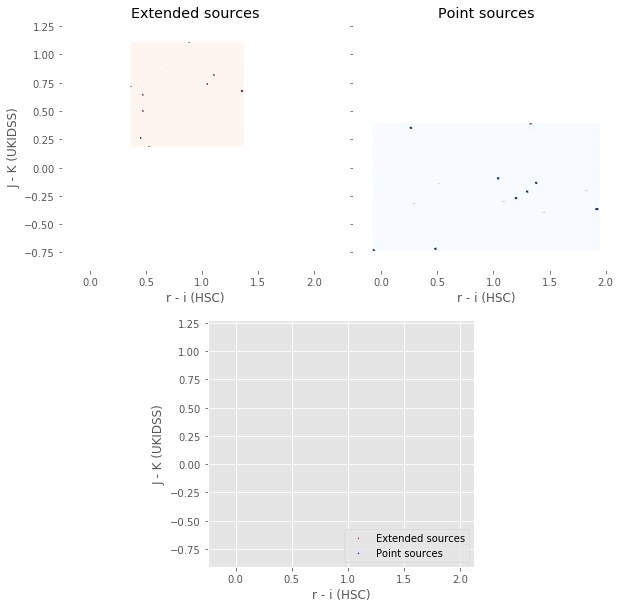

In [33]:
nb_ccplots(
    master_catalogue['m_suprime_r'] - master_catalogue['m_suprime_i'],
    master_catalogue['m_wfcam_j'] - master_catalogue['m_wfcam_k'],
    "r - i (HSC)", "J - K (UKIDSS)",
    master_catalogue["stellarity"]
)

Number of source used: 29 / 240582 (0.01%)


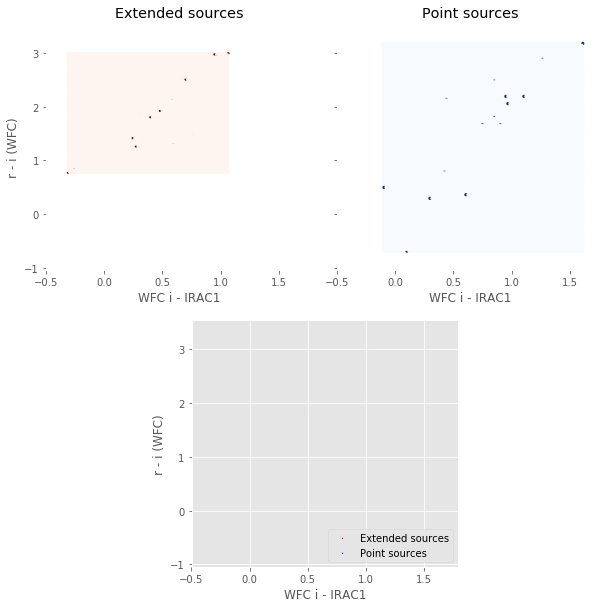

In [34]:
nb_ccplots(
    master_catalogue['m_suprime_i'] - master_catalogue['m_wfcam_j'],
    master_catalogue['m_suprime_r'] - master_catalogue['m_wfcam_k'],
    "WFC i - IRAC1", "r - i (WFC)",
    master_catalogue["stellarity"]
)

Number of source used: 29 / 240582 (0.01%)


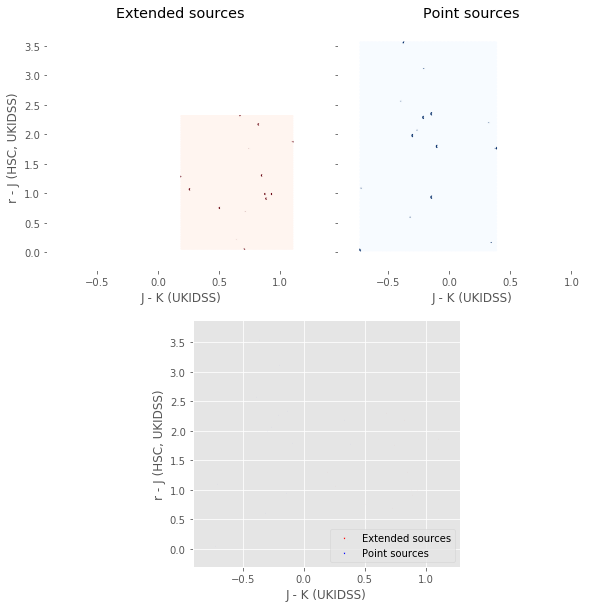

In [35]:
nb_ccplots(
    master_catalogue['m_wfcam_j'] - master_catalogue['m_wfcam_k'],
    master_catalogue['m_suprime_r'] - master_catalogue['m_wfcam_j'],
    "J - K (UKIDSS)", "r - J (HSC, UKIDSS)",
    master_catalogue["stellarity"]
)

In [36]:
nb_ccplots(
    master_catalogue['m_decam_i'] - master_catalogue['m_decam_z'],
    master_catalogue['m_decam_z'] - master_catalogue['m_wfcam_j'],
    "i - z (DECaLS)", "z - J (DECaLS, UKIDSS)",
    master_catalogue["stellarity"]
)

Number of source used: 0 / 240582 (0.00%)
HELP warning: no sources with observations in both bands
